In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [4]:
#Read in csv files


#full order record
#order_id, user_id, eval_set, order_number, order_dow, order_hour_of_day, days_since_prior_order
orders = pd.read_csv('Data/orders.csv')

#product info: product_id, product_name, aisle_id, department_id
products = pd.read_csv('Data/products.csv')
#aisles info: aisle_id, aisle
aisles = pd.read_csv('Data/aisles.csv')
#food departments info: department_id, department
departments = pd.read_csv('Data/departments.csv')

#order_id,product_id,add_to_cart_order,reordered
#data training file 
order_products_train = pd.read_csv('Data/order_products__train.csv') #1384617 rows
#data testing file 
orders_products_test = orders[orders.loc[:,'eval_set']== 'test'] #75000 rows × 7 columns

#order details: order_id, product_id, add_to_cart_order, reordered
order_products_prior = pd.read_csv('Data/order_products__prior.csv') #32434489 rows



### I. Exploratory Data Analysis

In [5]:
#Peeak at the first 5 line in order
orders.head()


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [6]:
order_products_prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [7]:
products.head() #321 4874


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [8]:
#Merge orders and order_products_prior on order_id
orders_products1 = orders.merge(order_products_prior, left_on = 'order_id', right_on = 'order_id', left_index = True)


In [9]:
#Merge orders_products and product on product_id
orders_products = orders_products1.merge(products, left_on = 'product_id', right_on = 'product_id', left_index = True)


In [10]:
orders_products.shape

(32434489, 13)

In [11]:
orders_products.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
195,2539329,1,prior,1,2,8,NaN,196,1,0,Soda,77,7
195,2398795,1,prior,2,3,7,15.0,196,1,1,Soda,77,7
195,473747,1,prior,3,3,12,21.0,196,1,1,Soda,77,7
195,2254736,1,prior,4,4,7,29.0,196,1,1,Soda,77,7
195,431534,1,prior,5,4,15,28.0,196,1,1,Soda,77,7


In [12]:
#order count group by 'user_id'
order_count_userID = orders_products.groupby('order_id').count() #3214874 rows
#find unique users
users = orders_products['user_id'].unique() #206209 users
len(users)

206209

In [13]:
#order count group by 'order_dow'
order_count_dow = orders_products.groupby(['order_dow']).agg({'order_id': pd.Series.nunique})    # count()
order_count_dow = order_count_dow.rename(columns = {"order_id": "unique_order_count"})

In [14]:
order_count_dow

,unique_order_count
order_dow,
0,557772
1,556705
2,441955
3,412400
4,401212
5,425982
6,418848


Text(0, 0.5, 'Unique Order Count')

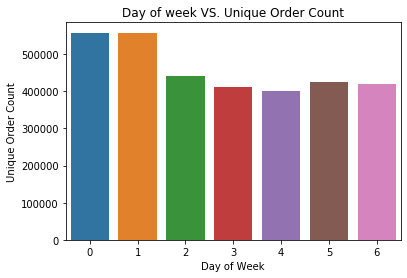

In [15]:
#plot dow vs. order count

#plt = order_count_dow['order_id'].plot()
#plt.title('Day of week VS. Order Count')
#plt.show()

ax = sns.barplot(x = order_count_dow.index , y = "unique_order_count", data=order_count_dow, capsize=.2)
ax.set_title("Day of week VS. Unique Order Count")
ax.set_xlabel('Day of Week')
ax.set_ylabel('Unique Order Count')


In [16]:
#Group by order_hour_of_day and count the number of orders
order_count_hod = orders_products.groupby(['order_hour_of_day']).agg({'order_id': pd.Series.nunique}).reset_index()
order_count_hod = order_count_hod.rename(columns = {"order_id": "unique_order_count"})


[(0, 24)]

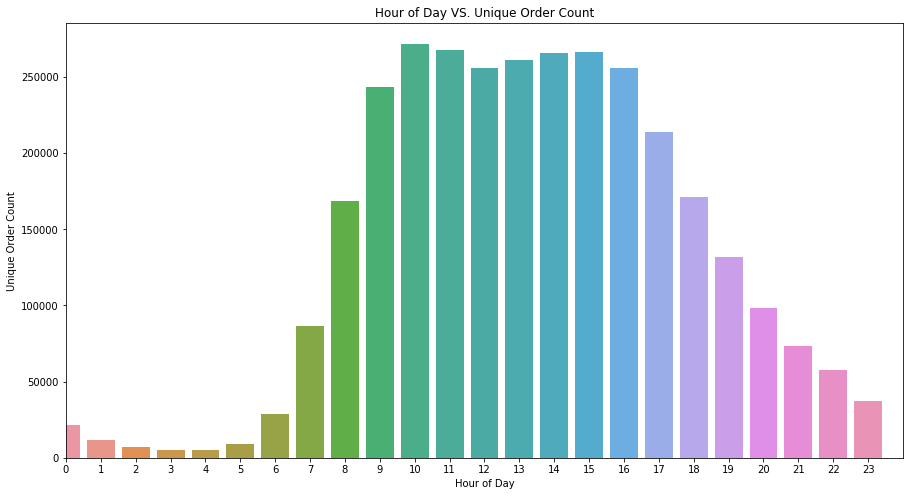

In [17]:
#plot order_hour_of_day vs. order count
import matplotlib.pyplot as plt

fig_dims = (15, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x = 'order_hour_of_day' , y = 'unique_order_count',  ax=ax, data=order_count_hod, capsize=.2)
ax.set_title("Hour of Day VS. Unique Order Count")
ax.set_xlabel('Hour of Day')
ax.set_ylabel('Unique Order Count')
ax.set(xlim=(0,24))


In [18]:
#Group by product_id and count the number of orders
order_count_productId = orders_products.groupby(['product_id'])['order_id'].count() \
                        .reset_index().sort_values(by=['order_id'],ascending=False)
order_count_productId = order_count_productId.rename(columns = {"order_id": "total_order_count"})


In [19]:
#Merge order_count_productId with products info
order_count_productIdInfo = order_count_productId.merge(products, left_on = 'product_id', right_on = 'product_id',left_index = True)
#Get the top 20 popular products 
product_top20 = order_count_productIdInfo.head(20)


Text(0, 0.5, 'Total Order Count')

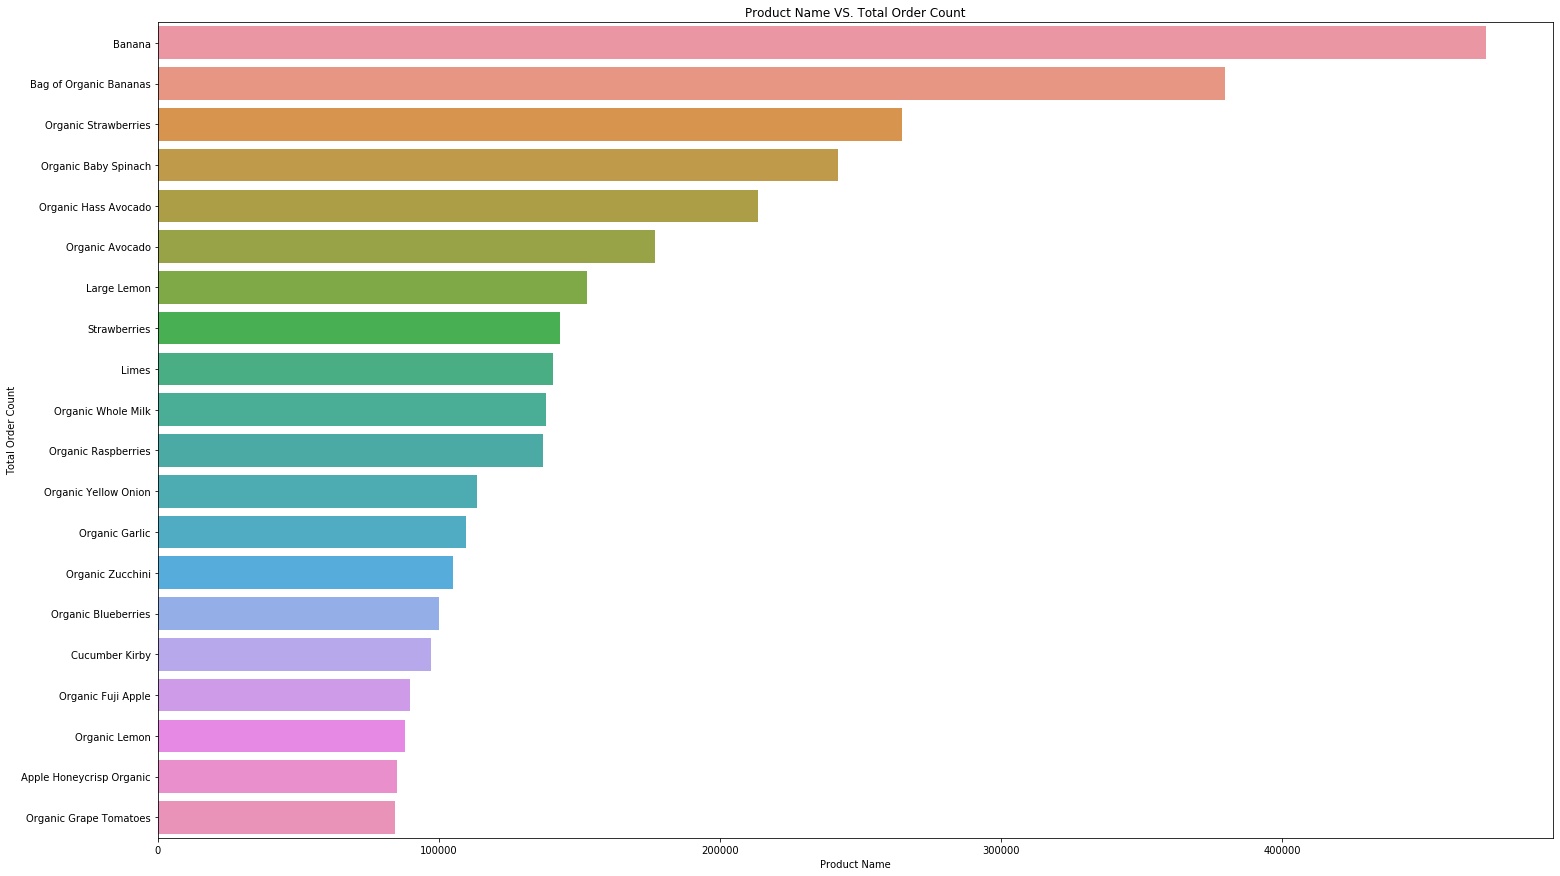

In [20]:
#Product Name VS. Order Count
fig_dims = (25, 15)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x = 'total_order_count' , y = 'product_name',  ax=ax, data=product_top20, capsize=.2)
ax.set_title("Product Name VS. Total Order Count")
ax.set_xlabel('Product Name')
ax.set_ylabel('Total Order Count')
#ax.set(xlim=(0,20))


In [21]:
#Group by user_id and count the number of orders (order_id) by each user
userID_order = orders_products.groupby('user_id').agg({'order_id': pd.Series.nunique}).reset_index()
#userID_order = orders_products.groupby('user_id')['order_number'].count().reset_index()
userID_order = userID_order.rename(columns = {"order_id": "unique_order_count"})


In [22]:
userID_order.head(10)

,user_id,unique_order_count
0,1,10
1,2,14
2,3,12
3,4,5
4,5,4
5,6,3
6,7,20
7,8,3
8,9,3
9,10,5


In [23]:
#Group by unique_order_count and count the number of users
userID_order2 = userID_order.groupby('unique_order_count').count().reset_index()
userID_order2 = userID_order2.rename(columns = {"user_id": "user_id_count"})


In [24]:
userID_order2.shape

(97, 2)

In [25]:
userID_order2.tail()

,unique_order_count,user_id_count
92,95,67
93,96,54
94,97,50
95,98,47
96,99,1374


Text(0, 0.5, 'Count of Users')

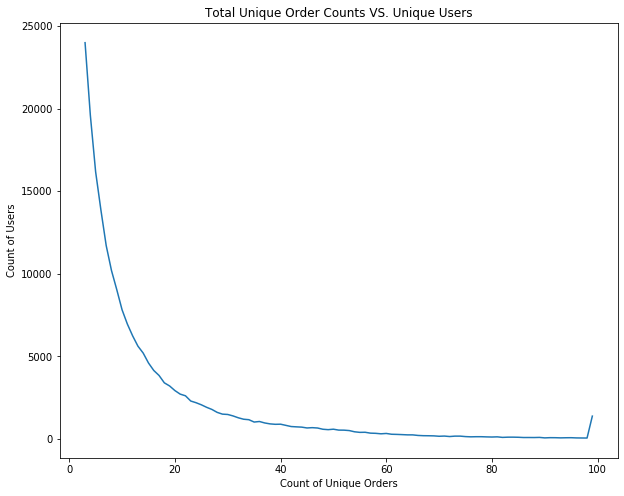

In [26]:
#plot: Count of Total Orders VS. Count of Users
fig_dims = (10, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.lineplot(x = 'unique_order_count' , y = 'user_id_count',  ax=ax, data=userID_order2)
ax.set_title("Total Unique Order Counts VS. Unique Users")
ax.set_xlabel('Count of Unique Orders')
ax.set_ylabel('Count of Users')
#ax.set(xlim=(0,20))


In [27]:
userID_order.mean() #.sort_values(ascending = False)[:100]

user_id               103105.000000
unique_order_count        15.590367
dtype: float64

In [28]:
#Group by order_dow and order_hour_of_day to find the count of unique orders
dow_hod_order_count = orders_products.loc[:,['order_dow','order_hour_of_day','order_id']].\
                    groupby(['order_dow','order_hour_of_day']).agg({'order_id': pd.Series.nunique}).reset_index()
dow_hod_order_count = dow_hod_order_count.rename(columns = {"order_id": "unique_order_count"})


In [29]:
dow_hod_order_count.head()

,order_dow,order_hour_of_day,unique_order_count
0,0,0,3692
1,0,1,2235
2,0,2,1299
3,0,3,888
4,0,4,750


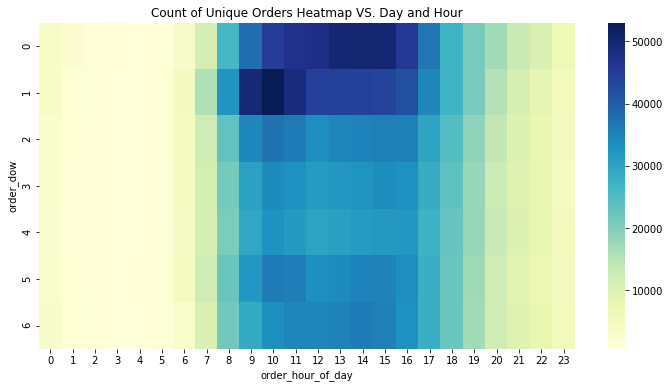

In [30]:
#plot a heatmap
#y: order_dow
#x: order_hour_of_day
#value: order_id
#dataframe: dow_hod_order_count

#Make a pivot table 
dow_hod_heat = dow_hod_order_count.pivot_table(index='order_dow', columns='order_hour_of_day', values='unique_order_count')
#Draw a heat map
plt.figure(figsize=(12,6))
sns.heatmap(dow_hod_heat,cmap="YlGnBu")
plt.title("Count of Unique Orders Heatmap VS. Day and Hour")
plt.show()

In [31]:
dow_hod_heat

order_hour_of_day,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
order_dow,,,,,,,,,,,,,,,,,,,,,
0,3692,2235,1299,888,750,1076,3138,11530,26223,37990,...,50484,50020,45930,36874,27347,20972,16984,13425,10440,6393
1,3475,1735,1063,711,761,1523,5101,15792,32563,49533,...,44220,43913,42200,34610,27293,20926,15422,11292,8458,5322
2,2906,1485,892,679,700,1330,4524,12550,23488,34499,...,35102,35408,35482,30216,24886,18922,14223,10071,7671,5079
3,2767,1407,889,605,666,1265,4314,11739,21305,30653,...,32863,33909,33284,28619,23536,18105,13064,9718,7732,4895
4,2476,1414,837,640,694,1251,4135,11823,20597,29645,...,31665,32095,32175,27577,22872,18194,13351,10169,8274,5308
5,2989,1539,953,796,857,1466,4573,12590,22623,32258,...,35131,35218,33700,28086,22700,17513,12557,8956,7006,4953
6,3067,1781,1137,801,747,1061,3007,10632,21522,28918,...,36091,35569,33178,28098,22364,16988,12508,9805,7959,5663


### K-means cluster: cluster users by some selected features.

#### i) Data Cleaning & Feature Selection

In [32]:
#K-means features:
#For example: a user has placed 5 order; for each order, the user bought 1,4,5,6,13 items; 
#orders are placed on different day of a week ,at different time of a day

#days_since_prior_order_mean, eg. mean(18,15,11,14,9)
#order_dow: [0,1] :  eg.2   -> need to normalize by unique_order_id
#order_dow: [2,6] :  eg.3   -> need to normalize by unique_order_id
#order_hour_of_day: [:,12]:  eg.3    -> need to normalize by unique_order_id
#order_hour_of_day: [12,17]: eg.2   -> need to normalize by unique_order_id
#order_hour_of_day: [17, :]: eg.0   -> need to normalize by unique_order_id
#median of items bought, which should be [max(add_to_cart_order) for each order]:  [1,4,5,6,13]  -> median: 5


#####calculate days_since_prior_order_mean######


In [33]:
#Replace NAN values with 0, since we are not counting the first order  
orders_products_noNA = orders_products.dropna().loc[:,['order_id','user_id','days_since_prior_order']]

In [34]:
orders_products_noNA.head()

,order_id,user_id,days_since_prior_order
195,2398795,1,15.0
195,473747,1,21.0
195,2254736,1,29.0
195,431534,1,28.0
195,3367565,1,19.0


In [35]:
orders_products_noNA.shape

(30356421, 3)

In [36]:
#Drop duplicate order_id
orders_products_noNA.drop_duplicates(subset ="order_id", keep = 'first', inplace = True) 
orders_products_noNA.shape

(3008665, 3)

In [37]:
#count unique order id
unique_order_id = orders_products_noNA.groupby('user_id')['order_id'].count()
#sum by days_since_prior_order
days_since_prior_order_sum = orders_products_noNA.groupby('user_id')['days_since_prior_order'].sum()


In [38]:
#Calculate the mean of days_since_prior_order
days_since_prior_order_mean = days_since_prior_order_sum/unique_order_id


#####split dow into two classes, count the number of orders and normalize#####

In [39]:
#Day of Week
#order_dow: [0,1] :  eg.2   -> normalize by unique_order_id
#order_dow: [2,6] :  eg.3   -> normalize by unique_order_id
order_dow = orders_products.loc[:,['order_id','user_id','order_dow']]
order_dow.drop_duplicates(subset ="order_id", keep = 'first', inplace = True)  #Drop duplicates

#split order_dow into two classes
order_dow1 = order_dow[order_dow['order_dow'] <= 1 ]  #[0,1]
order_dow2 = order_dow[order_dow['order_dow'] >= 2 ]  #[2,6]

In [40]:
#count the number of unique orders for each class
order_dow1_cnt = order_dow1.groupby('user_id')['order_dow'].count()
order_dow2_cnt = order_dow2.groupby('user_id')['order_dow'].count()


In [41]:
#Merge days_since_prior_order_mean & order_dow1_cnt & order_dow2_cnt
order_dow_kmean = pd.DataFrame(days_since_prior_order_mean).merge(order_dow1_cnt, \
                        left_on = 'user_id', right_on = 'user_id', how = 'left', left_index = True)


In [42]:
order_dow_kmean = order_dow_kmean.merge(order_dow2_cnt, \
                        left_on = 'user_id', right_on = 'user_id', how = 'left', left_index = True)

In [43]:
order_dow_kmean.head()

,0,order_dow_x,order_dow_y
user_id,,,
1,19.555556,3.0,7.0
2,15.230769,5.0,9.0
3,12.090909,8.0,4.0
4,13.750000,NaN,5.0
5,13.333333,2.0,2.0


#####split order_hour_of_day into three classes, count the number of orders and normalize #####

In [44]:
#Hour of Day
#order_hour_of_day: [:,12]: 3    -> normalize by unique_order_id
#order_hour_of_day: [12,17]: 1   -> normalize by unique_order_id
#order_hour_of_day: [17, :]: 0   -> normalize by unique_order_id

order_hour_of_day = orders_products.loc[:,['order_id','user_id','order_hour_of_day']]
order_hour_of_day.drop_duplicates(subset ="order_id", keep = 'first', inplace = True) #Drop duplicates

#split order_hour_of_day into two classes
order_hour_of_day1 = order_hour_of_day[order_hour_of_day['order_hour_of_day'] <= 12 ]  #[0,12]
order_hour_of_day2 = order_hour_of_day[(order_hour_of_day['order_hour_of_day'] >= 13) & (order_hour_of_day['order_hour_of_day'] <= 18)]  #[13,18]
order_hour_of_day3 = order_hour_of_day[order_hour_of_day['order_hour_of_day'] >= 19 ]  #[19,23]



In [45]:
#count the number of unique orders for each class
order_hour_of_day1_cnt = order_hour_of_day1.groupby('user_id')['order_hour_of_day'].count()
order_hour_of_day2_cnt = order_hour_of_day2.groupby('user_id')['order_hour_of_day'].count()
order_hour_of_day3_cnt = order_hour_of_day3.groupby('user_id')['order_hour_of_day'].count()


In [46]:
#Merge order_dow_kmean & order_hour_of_day1_cnt & order_hour_of_day2_cnt & order_hour_of_day3_cnt
order_dow_hod_kmean = order_dow_kmean.merge(order_hour_of_day1_cnt, \
                        left_on = 'user_id', right_on = 'user_id', how = 'left', left_index = True)

In [47]:
order_dow_hod_kmean = order_dow_hod_kmean.merge(order_hour_of_day2_cnt, \
                        left_on = 'user_id', right_on = 'user_id', how = 'left', left_index = True)

In [48]:
order_dow_hod_kmean = order_dow_hod_kmean.merge(order_hour_of_day3_cnt, \
                        left_on = 'user_id', right_on = 'user_id', how = 'left', left_index = True)

In [49]:
order_dow_hod_kmean.head()

,0,order_dow_x,order_dow_y,order_hour_of_day_x,order_hour_of_day_y,order_hour_of_day
user_id,,,,,,
1,19.555556,3.0,7.0,7.0,3.0,NaN
2,15.230769,5.0,9.0,13.0,1.0,NaN
3,12.090909,8.0,4.0,NaN,11.0,1.0
4,13.750000,NaN,5.0,2.0,3.0,NaN
5,13.333333,2.0,2.0,1.0,3.0,NaN


In [50]:
order_dow_hod_kmean.fillna(0, inplace = True)


In [51]:
order_dow_hod_kmean.rename(columns = {0:'days_since_prior_order_mean',\
                            'order_dow_x': 'order_dow1_cnt', 'order_dow_y': 'order_dow2_cnt',\
                            'order_hour_of_day_x': 'order_hour_of_day1_cnt', 'order_hour_of_day_y': 'order_hour_of_day2_cnt',\
                            'order_hour_of_day': 'order_hour_of_day3_cnt'}, inplace = True)


In [52]:
order_dow_hod_kmean.head()

,days_since_prior_order_mean,order_dow1_cnt,order_dow2_cnt,order_hour_of_day1_cnt,order_hour_of_day2_cnt,order_hour_of_day3_cnt
user_id,,,,,,
1,19.555556,3.0,7.0,7.0,3.0,0.0
2,15.230769,5.0,9.0,13.0,1.0,0.0
3,12.090909,8.0,4.0,0.0,11.0,1.0
4,13.750000,0.0,5.0,2.0,3.0,0.0
5,13.333333,2.0,2.0,1.0,3.0,0.0


In [53]:
#normalize: order_dow_cnt, order_hour_of_day_cnt
order_dow_hod_kmean['order_dow1_cnt_norm'] = order_dow_hod_kmean['order_dow1_cnt']/(order_dow_hod_kmean['order_dow1_cnt']+order_dow_hod_kmean['order_dow2_cnt'])
order_dow_hod_kmean['order_dow2_cnt_norm'] = order_dow_hod_kmean['order_dow2_cnt']/(order_dow_hod_kmean['order_dow1_cnt']+order_dow_hod_kmean['order_dow2_cnt'])


In [54]:
#normalize: order_hour_of_day1_cnt, order_hour_of_day2_cnt, order_hour_of_day3_cnt
order_dow_hod_kmean['order_hour_of_day1_cnt_norm'] = order_dow_hod_kmean['order_hour_of_day1_cnt']/(order_dow_hod_kmean['order_hour_of_day1_cnt']+order_dow_hod_kmean['order_hour_of_day2_cnt']+order_dow_hod_kmean['order_hour_of_day3_cnt'])
order_dow_hod_kmean['order_hour_of_day2_cnt_norm'] = order_dow_hod_kmean['order_hour_of_day2_cnt']/(order_dow_hod_kmean['order_hour_of_day1_cnt']+order_dow_hod_kmean['order_hour_of_day2_cnt']+order_dow_hod_kmean['order_hour_of_day3_cnt'])
order_dow_hod_kmean['order_hour_of_day3_cnt_norm'] = order_dow_hod_kmean['order_hour_of_day3_cnt']/(order_dow_hod_kmean['order_hour_of_day1_cnt']+order_dow_hod_kmean['order_hour_of_day2_cnt']+order_dow_hod_kmean['order_hour_of_day3_cnt'])


#####find median_itemsCnt_per_order######


In [55]:
#median of [max(add_to_cart_order) for each order]:  [1,4,5,6,13]  -> median: 5
orders_items_median = orders_products.loc[:,['order_id','user_id','add_to_cart_order']]


In [56]:
#Group by user_id & order_id, find the max add_to_cart_order
orders_items = orders_items_median.groupby(['user_id','order_id'])['add_to_cart_order'].max().reset_index()


In [57]:
#Group by user_id and aggregate all max add_to_cart_order to a list
user_median_list = orders_items.groupby('user_id')['add_to_cart_order'].agg(pd.Series.tolist) 


In [58]:
#Find the median for each list in user_median_list
medians = [np.median(x) for x in user_median_list]

In [59]:
order_dow_hod_kmean['median_itemsCnt_per_order'] = medians

In [60]:
order_dow_hod_kmean.head()

,days_since_prior_order_mean,order_dow1_cnt,order_dow2_cnt,order_hour_of_day1_cnt,order_hour_of_day2_cnt,order_hour_of_day3_cnt,order_dow1_cnt_norm,order_dow2_cnt_norm,order_hour_of_day1_cnt_norm,order_hour_of_day2_cnt_norm,order_hour_of_day3_cnt_norm,median_itemsCnt_per_order
user_id,,,,,,,,,,,,
1,19.555556,3.0,7.0,7.0,3.0,0.0,0.300000,0.700000,0.700000,0.300000,0.000000,5.5
2,15.230769,5.0,9.0,13.0,1.0,0.0,0.357143,0.642857,0.928571,0.071429,0.000000,13.5
3,12.090909,8.0,4.0,0.0,11.0,1.0,0.666667,0.333333,0.000000,0.916667,0.083333,7.0
4,13.750000,0.0,5.0,2.0,3.0,0.0,0.000000,1.000000,0.400000,0.600000,0.000000,3.0
5,13.333333,2.0,2.0,1.0,3.0,0.0,0.500000,0.500000,0.250000,0.750000,0.000000,10.0


#### ii) Modeling 

In [61]:
#Divide into train set and test set
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
import matplotlib.cm as cm
from sklearn.decomposition import PCA


In [149]:
X=order_dow_hod_kmean.loc[:,['days_since_prior_order_mean','order_dow1_cnt_norm', 'order_dow2_cnt_norm',\
       'order_hour_of_day1_cnt_norm', 'order_hour_of_day2_cnt_norm',\
       'order_hour_of_day3_cnt_norm', 'median_itemsCnt_per_order']]


In [63]:
X.shape

(206209, 7)

In [64]:
#X_test=order_dow_hod_kmean.loc[:,['days_since_prior_order_mean']]

In [151]:
#Randomly select 5% of rows from X for 5 times
#Find the best n_clusters
range_n_clusters = [2,3,4,5,6,7,8,9]
for n in range(5):
    X1 = X.sample(frac = 0.05) 
    print('The {} time:'.format(n+1))
    for n_clusters in range_n_clusters:
        km = KMeans(n_clusters=n_clusters, random_state=324)
        cluster_labels = km.fit_predict(X1)
        silhouette_avg = silhouette_score(X1, cluster_labels)
        print('For n_clusters = {} the average silhouette_score is: {}'.format(n_clusters, silhouette_avg))
        sample_silhouette_values = silhouette_samples(X1, cluster_labels)


The 1 time:
For n_clusters = 2 the average silhouette_score is: 0.3783239012447758
For n_clusters = 3 the average silhouette_score is: 0.4046198103985214
For n_clusters = 4 the average silhouette_score is: 0.3462933280401561
For n_clusters = 5 the average silhouette_score is: 0.355616448026688
For n_clusters = 6 the average silhouette_score is: 0.3497644187757714
For n_clusters = 7 the average silhouette_score is: 0.34067410093344136
For n_clusters = 8 the average silhouette_score is: 0.32708306182530933
For n_clusters = 9 the average silhouette_score is: 0.3277584598847259
The 2 time:
For n_clusters = 2 the average silhouette_score is: 0.3921293308509157
For n_clusters = 3 the average silhouette_score is: 0.40925550411838957
For n_clusters = 4 the average silhouette_score is: 0.3445554554500948
For n_clusters = 5 the average silhouette_score is: 0.3571123410484235
For n_clusters = 6 the average silhouette_score is: 0.3541934690839409
For n_clusters = 7 the average silhouette_score is:

### When n_clusters = 3, the average silhouette_score is maximum.

In [66]:
len(X)

206209

In [67]:
len(X)*0.05

10310.45

In [ ]:
def kmeans_modeling_plot(X):
    #sample for 5 %
    X1 = X.sample(frac = 0.05) 
    #n_clusters=3
    km = KMeans(random_state=n,n_clusters=3)
    res=km.fit(X1)
    
    print('\nCluster centers:\n',res.cluster_centers_)
    print('\nSum of squared errors:',res.inertia_)

    pca=PCA(2)
    Xproj=pca.fit_transform(X1)
    plt.scatter(Xproj[:,0],Xproj[:,1],c=res.labels_)
    plt.show()
    return res,X1

In [ ]:
for n in range(5):
    kmeans_modeling_plot(X)

# # plot points and cluster assigments
# plt.figure(figsize=(3,3))
# plt.scatter(X[:,0],X[:,1],c=res.labels_,cmap=plt.cm.cool)
# plt.scatter(res.cluster_centers_[0,0],res.cluster_centers_[0,1],c="b",s=100)
# plt.scatter(res.cluster_centers_[1,0],res.cluster_centers_[1,1],c="r",s=100)
# plt.show()

In [70]:
#sample 5% of data with fixed random_state
X1 = X.sample(frac = 0.05, random_state = 324) 
km = KMeans(random_state=n,n_clusters=3)
random_km_res=km.fit(X1)


In [71]:
random_km_res.labels_[:50]

array([0, 0, 0, 1, 1, 0, 2, 1, 1, 1, 2, 1, 1, 0, 0, 0, 0, 2, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 2, 1, 1, 0, 1, 0, 2, 0, 0, 1, 1, 1, 0, 2, 2, 0, 2,
       1, 1, 1, 2, 2, 1], dtype=int32)

In [72]:
X1['Label'] = random_km_res.labels_

In [73]:
X1.head(10)# DF with Labels

,days_since_prior_order_mean,order_dow1_cnt_norm,order_dow2_cnt_norm,order_hour_of_day1_cnt_norm,order_hour_of_day2_cnt_norm,order_hour_of_day3_cnt_norm,median_itemsCnt_per_order,Label
user_id,,,,,,,,
128267,25.666667,0.285714,0.714286,0.428571,0.571429,0.000000,7.0,0
27209,23.000000,0.400000,0.600000,0.000000,0.800000,0.200000,10.0,0
79604,30.000000,0.428571,0.571429,0.285714,0.428571,0.285714,5.0,0
100837,9.346154,0.370370,0.629630,0.185185,0.666667,0.148148,12.0,1
204805,7.200000,0.363636,0.636364,0.454545,0.363636,0.181818,13.0,1
46805,25.600000,0.666667,0.333333,0.333333,0.500000,0.166667,3.0,0
159690,15.181818,0.333333,0.666667,0.500000,0.000000,0.500000,14.0,2
32479,8.666667,0.250000,0.750000,0.500000,0.250000,0.250000,5.0,1
57976,7.833333,0.142857,0.857143,0.714286,0.142857,0.142857,9.0,1


In [74]:
X1[X1['Label'] == 0].describe()

,days_since_prior_order_mean,order_dow1_cnt_norm,order_dow2_cnt_norm,order_hour_of_day1_cnt_norm,order_hour_of_day2_cnt_norm,order_hour_of_day3_cnt_norm,median_itemsCnt_per_order,Label
count,3610.000000,3610.000000,3610.000000,3610.000000,3610.000000,3610.000000,3610.000000,3610.0
mean,22.489218,0.357583,0.642417,0.402405,0.469186,0.128409,7.263712,0.0
std,4.300449,0.240254,0.240254,0.263942,0.259087,0.175202,3.882699,0.0
min,16.083333,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0
25%,18.833333,0.200000,0.500000,0.200000,0.285714,0.000000,4.000000,0.0
50%,21.707143,0.333333,0.666667,0.375000,0.500000,0.000000,7.000000,0.0
75%,25.666667,0.500000,0.800000,0.600000,0.666667,0.222222,10.000000,0.0
max,30.000000,1.000000,1.000000,1.000000,1.000000,1.000000,20.000000,0.0


In [76]:
X1[X1['Label'] == 1].describe()

,days_since_prior_order_mean,order_dow1_cnt_norm,order_dow2_cnt_norm,order_hour_of_day1_cnt_norm,order_hour_of_day2_cnt_norm,order_hour_of_day3_cnt_norm,median_itemsCnt_per_order,Label
count,4900.000000,4900.000000,4900.000000,4900.000000,4900.000000,4900.000000,4900.000000,4900.0
mean,9.886518,0.338420,0.661580,0.422701,0.454240,0.123058,7.525408,1.0
std,3.610311,0.191701,0.191701,0.227306,0.215419,0.145818,3.433638,0.0
min,0.295918,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0
25%,7.000000,0.218124,0.566667,0.262446,0.307692,0.000000,5.000000,1.0
50%,9.952381,0.324324,0.675676,0.407651,0.444444,0.080552,7.000000,1.0
75%,13.000000,0.433333,0.781876,0.571429,0.600000,0.193548,10.000000,1.0
max,16.230769,1.000000,1.000000,1.000000,1.000000,1.000000,17.000000,1.0


In [77]:
X1[X1['Label'] == 2].describe()

,days_since_prior_order_mean,order_dow1_cnt_norm,order_dow2_cnt_norm,order_hour_of_day1_cnt_norm,order_hour_of_day2_cnt_norm,order_hour_of_day3_cnt_norm,median_itemsCnt_per_order,Label
count,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.0
mean,15.006986,0.385837,0.614163,0.412542,0.452821,0.134637,19.416667,2.0
std,5.621325,0.228149,0.228149,0.239154,0.242834,0.169070,5.417813,0.0
min,2.357143,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,2.0
25%,10.860837,0.232111,0.500000,0.250000,0.285714,0.000000,16.000000,2.0
50%,14.946779,0.360000,0.640000,0.400000,0.440588,0.083333,18.000000,2.0
75%,18.546703,0.500000,0.767889,0.594595,0.625000,0.200000,22.000000,2.0
max,30.000000,1.000000,1.000000,1.000000,1.000000,1.000000,73.500000,2.0


In [78]:
# remove mean of prior order days, we only consider time as factor

In [79]:
#USER: user_purchase_behavior,  item_variety 

In [80]:
#

### K-mean clustering on product selection based on department_id

#####find user buy items from what departments and what is/are the most frequently bought item(s)#####

In [81]:
#quantify the product type for each user
orders_items_type = orders_products.loc[:,['order_id','user_id','department_id']]


In [82]:
orders_items_type.head()

,order_id,user_id,department_id
195,2539329,1,7
195,2398795,1,7
195,473747,1,7
195,2254736,1,7
195,431534,1,7


In [83]:
# User Purchase Preference
# EX.
# user A:
# order: 10202 [1,9,20]
# order: 10203 [1,20]
# order: 10204 [7]
# user A: [1,9,20,1,20,7]  UNIQUE: 4  FAV:[1,20]  CNT:2

In [84]:
#Group by user_id; find all items' department_id the user ordered
user_items_types = orders_items_type.groupby(['user_id'])['department_id'].agg(pd.Series.tolist).reset_index()


In [85]:
from collections import Counter

def multimode(my_list):
    counter = Counter(my_list)
    max_count = max(counter.values())
    mode = [k for k,v in counter.items() if v == max_count]
    #if has multimodes, only return the first mode
    return mode

def maxCount(my_list):
    counter = Counter(my_list)
    return max(counter.values())

In [86]:
user_items_types['unique_departments'] = [len(set(x)) for x in user_items_types['department_id']]
user_items_types['max_freq_departments'] = [multimode(x) for x in user_items_types['department_id']]
user_items_types['max_freq_departments_cnt'] = [maxCount(x) for x in user_items_types['department_id']]


In [87]:
#take either department id if there are two modes
max_freq_departments = [x[0] for x in user_items_types['max_freq_departments']] 
user_items_types['max_freq_departments1'] = max_freq_departments

In [88]:
user_items_types.head()

,user_id,department_id,unique_departments,max_freq_departments,max_freq_departments_cnt,max_freq_departments1
0,1,"[7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 16, 19, 19, 19,...",7,[19],22,19
1,2,"[4, 4, 4, 19, 19, 19, 19, 19, 19, 19, 19, 19, ...",13,[16],48,16
2,3,"[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, ...",9,[4],38,4
3,4,"[4, 4, 3, 7, 1, 1, 17, 5, 17, 15, 7, 3, 1, 5, ...",9,"[7, 1]",3,7
4,5,"[20, 13, 6, 6, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4...",9,[4],19,4


In [89]:
user_items_types.shape

(206209, 6)

In [90]:
#problem: small selection of features

In [152]:
X_department=user_items_types.loc[:,['unique_departments','max_freq_departments1','max_freq_departments_cnt']]

In [92]:
#X_department = order_dow_hod_kmean.merge(user_items_types, left_on = 'user_id', right_on = 'user_id', left_index = True)
# X_department1 = X_department.loc[:,['days_since_prior_order_mean','order_dow1_cnt_norm', 'order_dow2_cnt_norm',\
#        'order_hour_of_day1_cnt_norm', 'order_hour_of_day2_cnt_norm',\
#        'order_hour_of_day3_cnt_norm', 'median_itemsCnt_per_order','unique_departments']]

In [153]:
range_n_clusters = [2,3,4,5]
for n in range(5):
    department2 = X_department.sample(frac = 0.05)  
    print('The {} time:'.format(n+1))
    for n_clusters in range_n_clusters:
        km = KMeans(n_clusters=n_clusters, random_state=324)
        cluster_labels = km.fit_predict(department2)
        silhouette_avg = silhouette_score(department2, cluster_labels)
        print('For n_clusters = {} the average silhouette_score is: {}'.format(n_clusters, silhouette_avg))
        sample_silhouette_values = silhouette_samples(department2, cluster_labels)


The 1 time:
For n_clusters = 2 the average silhouette_score is: 0.7792728970190662
For n_clusters = 3 the average silhouette_score is: 0.6847063519254912
For n_clusters = 4 the average silhouette_score is: 0.6544079651401215
For n_clusters = 5 the average silhouette_score is: 0.6073488733568452
The 2 time:
For n_clusters = 2 the average silhouette_score is: 0.7751561721741745
For n_clusters = 3 the average silhouette_score is: 0.6923638644975867
For n_clusters = 4 the average silhouette_score is: 0.6258684856328914
For n_clusters = 5 the average silhouette_score is: 0.5957348409300456
The 3 time:
For n_clusters = 2 the average silhouette_score is: 0.778761920022622
For n_clusters = 3 the average silhouette_score is: 0.6937802284370851
For n_clusters = 4 the average silhouette_score is: 0.6411919620358613
For n_clusters = 5 the average silhouette_score is: 0.6033328728732493
The 4 time:
For n_clusters = 2 the average silhouette_score is: 0.7643234016603844
For n_clusters = 3 the average

In [154]:
def kmeans_modeling_plot2(X):
    #sample for 5 times
    department1 = X.sample(frac = 0.05) 
    #n_clusters=2
    km = KMeans(random_state=n,n_clusters=2)
    res=km.fit(department1)
    
    print('\nCluster centers:\n',res.cluster_centers_)
    print('\nSum of squared errors:',res.inertia_)

    pca=PCA(2)
    Xproj=pca.fit_transform(department1)
    plt.scatter(Xproj[:,0],Xproj[:,1],c=res.labels_)
    plt.show()
    return res,department1


Cluster centers:
 [[ 10.46844139   7.64501932  34.61464148]
 [ 14.44668008   6.06136821 245.9778672 ]]

Sum of squared errors: 22879417.80723003


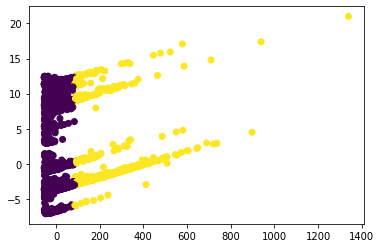


Cluster centers:
 [[ 10.44011142   7.70794943  34.82569102]
 [ 14.36270492   6.1875     234.92213115]]

Sum of squared errors: 20748484.530539185


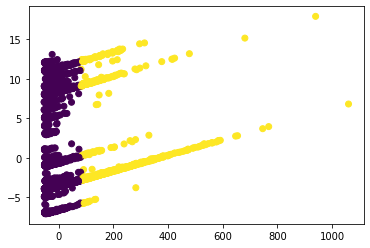


Cluster centers:
 [[ 10.40058543   7.64559844  33.93603643]
 [ 14.54511971   5.87753223 227.16574586]]

Sum of squared errors: 18718749.726293724


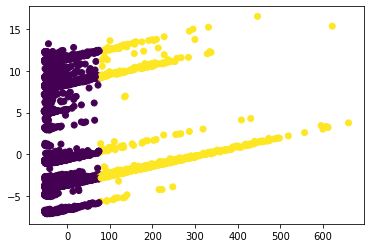


Cluster centers:
 [[ 10.44823554   7.60905612  35.30771684]
 [ 14.61197339   6.41019956 249.92682927]]

Sum of squared errors: 21079558.646469202


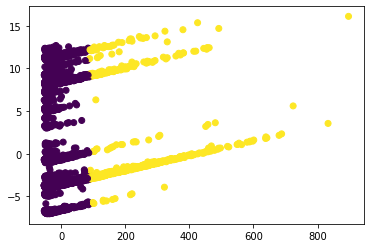


Cluster centers:
 [[ 10.43483451   7.61573521  34.49115572]
 [ 14.44018265   5.90502283 224.32511416]]

Sum of squared errors: 19831904.179406714


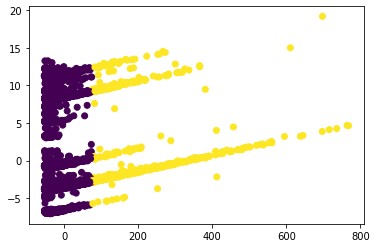

In [155]:
for n in range(5):
    kmeans_modeling_plot2(X_department)

#### Adding more feature into consideration, such as product type 

In [96]:
#try1=orders_items_type.drop_duplicates()# check behavior of Varity

In [97]:
orders_items_type.head()

,order_id,user_id,department_id
195,2539329,1,7
195,2398795,1,7
195,473747,1,7
195,2254736,1,7
195,431534,1,7


In [98]:
try2=orders_items_type.iloc[:,1:]
try2[:10]

,user_id,department_id
195,1,7
195,1,7
195,1,7
195,1,7
195,1,7
195,1,7
195,1,7
195,1,7
195,1,7
195,1,7


In [99]:
department_cross=pd.crosstab(try2['user_id'],try2['department_id'])

In [100]:
department_cross_clean=department_cross.iloc[:,:21]
department_cross_clean.head()

department_id,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
user_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,5,0,0,13,0,0,0,...,0,1,3,0,13,2,0,22,0,0
2,17,0,2,36,0,3,9,0,0,0,...,1,11,3,1,48,0,0,42,21,0
3,6,0,0,38,0,0,3,0,4,0,...,0,4,0,0,21,1,0,9,2,0
4,3,0,2,2,2,0,3,0,0,0,...,0,0,0,1,0,2,0,1,2,0
5,2,0,0,19,0,2,0,0,1,0,...,0,2,0,1,8,0,0,1,1,0


In [101]:
department_cross_aprior=department_cross_clean.astype(bool).astype(int)
department_cross_aprior.head()

department_id,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
user_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,1,0,0,1,0,0,0,...,0,1,1,0,1,1,0,1,0,0
2,1,0,1,1,0,1,1,0,0,0,...,1,1,1,1,1,0,0,1,1,0
3,1,0,0,1,0,0,1,0,1,0,...,0,1,0,0,1,1,0,1,1,0
4,1,0,1,1,1,0,1,0,0,0,...,0,0,0,1,0,1,0,1,1,0
5,1,0,0,1,0,1,0,0,1,0,...,0,1,0,1,1,0,0,1,1,0


In [102]:
#Kmean 
X_cross=department_cross_clean


In [103]:
X_cross.head()

department_id,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
user_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,5,0,0,13,0,0,0,...,0,1,3,0,13,2,0,22,0,0
2,17,0,2,36,0,3,9,0,0,0,...,1,11,3,1,48,0,0,42,21,0
3,6,0,0,38,0,0,3,0,4,0,...,0,4,0,0,21,1,0,9,2,0
4,3,0,2,2,2,0,3,0,0,0,...,0,0,0,1,0,2,0,1,2,0
5,2,0,0,19,0,2,0,0,1,0,...,0,2,0,1,8,0,0,1,1,0


In [104]:
len(X_cross)*0.05

10310.45

In [105]:
range_n_clusters = [2,3,4,5]
for n in range(5):
    department2 = X_cross.sample(frac = 0.1)  
    print('The {} time:'.format(n+1))
    for n_clusters in range_n_clusters:
        km = KMeans(n_clusters=n_clusters, random_state=324)
        cluster_labels = km.fit_predict(department2)
        silhouette_avg = silhouette_score(department2, cluster_labels)
        print('For n_clusters = {} the average silhouette_score is: {}'.format(n_clusters, silhouette_avg))
        sample_silhouette_values = silhouette_samples(department2, cluster_labels)


The 1 time:
For n_clusters = 2 the average silhouette_score is: 0.7096206891517725
For n_clusters = 3 the average silhouette_score is: 0.5850532789945724
For n_clusters = 4 the average silhouette_score is: 0.4806397063387389
For n_clusters = 5 the average silhouette_score is: 0.46689155198000803
The 2 time:
For n_clusters = 2 the average silhouette_score is: 0.7039111337169969
For n_clusters = 3 the average silhouette_score is: 0.5751062417965099
For n_clusters = 4 the average silhouette_score is: 0.4822872480724153
For n_clusters = 5 the average silhouette_score is: 0.4650785805225712
The 3 time:
For n_clusters = 2 the average silhouette_score is: 0.7031930027560932
For n_clusters = 3 the average silhouette_score is: 0.5831031810572539
For n_clusters = 4 the average silhouette_score is: 0.47287076227437014
For n_clusters = 5 the average silhouette_score is: 0.46043361915450154
The 4 time:
For n_clusters = 2 the average silhouette_score is: 0.7133759958368066
For n_clusters = 3 the ave

In [106]:
def kmeans_modeling_plot3(X):
    #sample for 5 times
    department2 = X.sample(frac = 0.05) 
    #n_clusters=2
    km = KMeans(random_state=n,n_clusters=2)
    res=km.fit(department2)
    
    print('\nCluster centers:\n',res.cluster_centers_)
    print('\nSum of squared errors:',res.inertia_)

    pca=PCA(2)
    Xproj=pca.fit_transform(department2)
    plt.scatter(Xproj[:,0],Xproj[:,1],c=res.labels_)
    plt.show()
    return res,department2


Cluster centers:
 [[7.84637145e+00 1.28930475e-01 3.77271244e+00 2.66511805e+01
  7.50081602e-01 9.20574475e-01 9.45163747e+00 3.73843978e-01
  2.90980307e+00 9.33521924e-02 1.68795561e+00 2.37351757e+00
  6.22946361e+00 2.35012512e+00 3.51865956e+00 1.65384615e+01
  2.88020890e+00 1.11609183e+00 9.35545642e+00 3.35632684e+00
  2.63192253e-01]
 [3.53637176e+01 5.44235925e-01 2.16050045e+01 2.09467382e+02
  1.12332440e+00 4.61215371e+00 4.06175156e+01 8.77569258e-01
  1.51581769e+01 7.45308311e-01 6.19481680e+00 1.24915103e+01
  3.33610366e+01 1.22600536e+01 1.94209115e+01 1.07329759e+02
  9.54602324e+00 9.41554960e+00 5.02984808e+01 1.96309205e+01
  1.02412869e+00]]

Sum of squared errors: 52449667.355532266


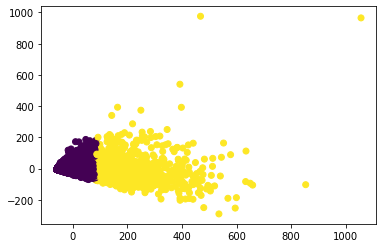


Cluster centers:
 [[7.95235529e+00 1.29998922e-01 3.86396464e+00 2.75914628e+01
  7.72016816e-01 8.84229816e-01 9.54953110e+00 4.09615177e-01
  2.78613776e+00 8.65581546e-02 1.66713377e+00 2.33965722e+00
  6.32036219e+00 2.34687938e+00 3.49552657e+00 1.66303762e+01
  2.77902339e+00 1.18087744e+00 9.36272502e+00 3.42373612e+00
  2.44044411e-01]
 [3.66166505e+01 4.76282672e-01 2.16999032e+01 2.10397870e+02
  8.51887706e-01 4.87705712e+00 4.59486931e+01 8.96418199e-01
  1.57395934e+01 7.10551791e-01 5.76766699e+00 1.28973863e+01
  3.30271055e+01 1.22391094e+01 1.92042594e+01 1.11873185e+02
  9.32817038e+00 1.16282672e+01 5.09709584e+01 2.05237173e+01
  1.08518877e+00]]

Sum of squared errors: 54170998.318261415


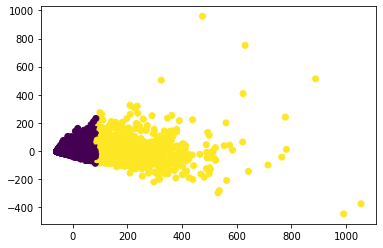


Cluster centers:
 [[7.87677468e+00 1.33196055e-01 3.86008453e+00 2.75426466e+01
  7.85087244e-01 8.98666956e-01 9.75777609e+00 4.68733066e-01
  2.82865503e+00 9.79733391e-02 1.70141975e+00 2.30649182e+00
  6.43058416e+00 2.35710415e+00 3.50612333e+00 1.70086702e+01
  2.89173079e+00 1.14771865e+00 9.64842311e+00 3.37065135e+00
  2.65958600e-01]
 [3.60729455e+01 3.92428440e-01 2.21006464e+01 2.07228994e+02
  7.11911357e-01 4.91689751e+00 4.33342567e+01 1.66851339e+00
  1.63647276e+01 8.10710988e-01 6.01108033e+00 1.36943675e+01
  3.39362881e+01 1.20951062e+01 1.99806094e+01 1.10097876e+02
  1.00664820e+01 9.76915974e+00 5.53037858e+01 2.08439520e+01
  1.03785780e+00]]

Sum of squared errors: 53273140.013121195


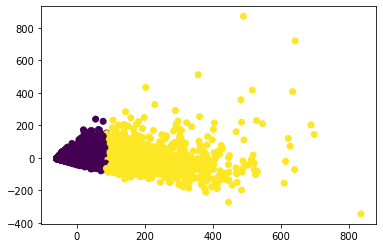


Cluster centers:
 [[7.84160757e+00 1.34321943e-01 3.82355470e+00 2.72546744e+01
  6.49795831e-01 9.17042768e-01 9.66774124e+00 4.50354610e-01
  2.88942618e+00 9.24134967e-02 1.71921341e+00 2.37405975e+00
  6.39136041e+00 2.47206104e+00 3.53094778e+00 1.70824199e+01
  2.91500107e+00 1.10702772e+00 9.62615517e+00 3.43702987e+00
  2.45218139e-01]
 [3.54282869e+01 4.57171315e-01 2.24601594e+01 2.16869522e+02
  1.01992032e+00 5.06175299e+00 4.09880478e+01 1.01195219e+00
  1.65318725e+01 8.07768924e-01 5.93924303e+00 1.33745020e+01
  3.37808765e+01 1.28545817e+01 1.99651394e+01 1.08159363e+02
  8.83764940e+00 9.01294821e+00 5.30667331e+01 2.01304781e+01
  1.11752988e+00]]

Sum of squared errors: 50336860.91280034


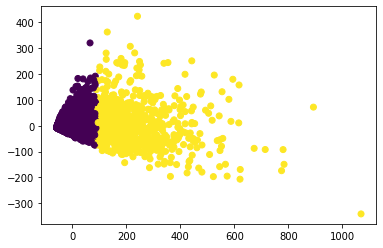


Cluster centers:
 [[7.88365019e+00 1.42422596e-01 3.76719174e+00 2.68749593e+01
  6.29766431e-01 9.03096143e-01 9.56230310e+00 3.96958175e-01
  2.86159696e+00 9.58174905e-02 1.65040739e+00 2.29538294e+00
  6.19598045e+00 2.36545356e+00 3.50744161e+00 1.66513851e+01
  2.91363389e+00 1.25812059e+00 9.49353612e+00 3.33297121e+00
  2.40304183e-01]
 [3.87556561e+01 5.11312217e-01 2.32036199e+01 2.05551131e+02
  1.40542986e+00 4.95294118e+00 4.21819005e+01 1.16380090e+00
  1.58570136e+01 6.96832579e-01 5.83981900e+00 1.28461538e+01
  3.35638009e+01 1.32850679e+01 1.99701357e+01 1.11422624e+02
  1.01167421e+01 9.74932127e+00 5.27366516e+01 2.06588235e+01
  1.15022624e+00]]

Sum of squared errors: 53382471.25741615


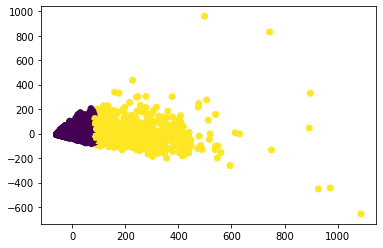

In [107]:
for n in range(5):
    kmeans_modeling_plot2(X_cross)


Cluster centers:
 [[3.86638177e+01 6.59069326e-01 2.33333333e+01 2.13573599e+02
  1.60968661e+00 5.09876543e+00 4.22317189e+01 1.45109212e+00
  1.68195632e+01 8.29059829e-01 6.70370370e+00 1.26315290e+01
  3.40189934e+01 1.22003799e+01 1.96524217e+01 1.10644824e+02
  1.02668566e+01 1.15413105e+01 5.19791073e+01 2.13352327e+01
  1.13010446e+00]
 [8.21724101e+00 1.40002161e-01 3.83385546e+00 2.74810414e+01
  7.45489900e-01 9.61110511e-01 9.82132440e+00 4.12876742e-01
  2.93691261e+00 1.02408988e-01 1.77606136e+00 2.38878686e+00
  6.51409744e+00 2.45759965e+00 3.72442476e+00 1.68172194e+01
  2.94512261e+00 1.13643729e+00 9.83990494e+00 3.42659609e+00
  2.52241547e-01]]

Sum of squared errors: 53373234.51941433


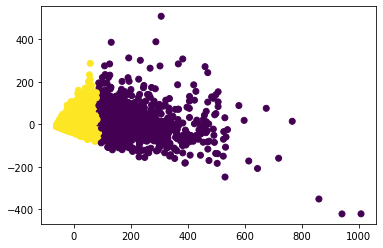

In [108]:
random_km_res_cross, department2 =  kmeans_modeling_plot3(X_cross)

In [109]:
len(random_km_res_cross.labels_)

10310

In [110]:
department2['Label'] = random_km_res_cross.labels_
department2.head()

department_id,1,2,3,4,5,6,7,8,9,10,...,13,14,15,16,17,18,19,20,21,Label
user_id,,,,,,,,,,,,,,,,,,,,,
195775,0,0,0,99,0,4,12,0,0,0,...,7,1,0,139,0,0,61,0,5,0
72183,4,0,5,79,0,0,5,0,0,0,...,3,4,2,9,0,0,3,9,0,1
161898,8,0,4,8,0,0,2,0,1,0,...,4,5,1,12,0,0,8,1,0,1
78608,52,0,18,66,0,0,8,0,13,0,...,13,1,9,98,1,15,35,9,2,1
202896,53,0,5,174,0,4,99,0,0,0,...,28,13,15,59,0,0,53,24,0,0


In [111]:
#Check the description of label == 0 
department2[department2['Label']==0].describe()

department_id,1,2,3,4,5,6,7,8,9,10,...,13,14,15,16,17,18,19,20,21,Label
count,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000,...,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000,1053.0
mean,38.663818,0.659069,23.333333,213.573599,1.609687,5.098765,42.231719,1.451092,16.819563,0.829060,...,34.018993,12.200380,19.652422,110.644824,10.266857,11.541311,51.979107,21.335233,1.130104,0.0
std,37.663017,2.555209,27.848313,114.545197,14.258964,8.066367,47.795324,11.348302,16.996861,3.160959,...,25.562970,15.249843,19.762968,69.891504,19.451754,34.733333,50.350516,24.827363,2.793116,0.0
min,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,13.000000,0.000000,7.000000,140.000000,0.000000,0.000000,12.000000,0.000000,5.000000,0.000000,...,17.000000,2.000000,6.000000,61.000000,1.000000,0.000000,18.000000,6.000000,0.000000,0.0
50%,29.000000,0.000000,17.000000,184.000000,0.000000,2.000000,28.000000,0.000000,12.000000,0.000000,...,28.000000,7.000000,15.000000,96.000000,3.000000,0.000000,39.000000,15.000000,0.000000,0.0
75%,52.000000,0.000000,32.000000,258.000000,0.000000,7.000000,57.000000,0.000000,23.000000,0.000000,...,45.000000,17.000000,26.000000,142.000000,12.000000,6.000000,67.000000,29.000000,1.000000,0.0
max,336.000000,37.000000,564.000000,1112.000000,245.000000,106.000000,480.000000,217.000000,126.000000,46.000000,...,239.000000,146.000000,191.000000,562.000000,233.000000,546.000000,439.000000,429.000000,43.000000,0.0


In [112]:
#Check the description of label == 0 
department2[department2['Label']==1].describe()

department_id,1,2,3,4,5,6,7,8,9,10,...,13,14,15,16,17,18,19,20,21,Label
count,9257.000000,9257.000000,9257.000000,9257.000000,9257.000000,9257.000000,9257.000000,9257.000000,9257.000000,9257.000000,...,9257.000000,9257.0000,9257.000000,9257.000000,9257.000000,9257.000000,9257.000000,9257.000000,9257.000000,9257.0
mean,8.217241,0.140002,3.833855,27.481041,0.745490,0.961111,9.821324,0.412877,2.936913,0.102409,...,6.514097,2.4576,3.724425,16.817219,2.945123,1.136437,9.839905,3.426596,0.252242,1.0
std,13.111821,0.801263,6.429547,29.202825,6.494566,2.492383,16.214185,3.804906,5.226970,0.830420,...,8.605216,5.0352,6.285453,19.900125,7.106473,6.062202,17.064613,5.855878,1.043564,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,1.000000,0.000000,0.000000,6.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,0.0000,0.000000,4.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.0
50%,4.000000,0.000000,2.000000,17.000000,0.000000,0.000000,5.000000,0.000000,1.000000,0.000000,...,4.000000,1.0000,1.000000,10.000000,1.000000,0.000000,5.000000,1.000000,0.000000,1.0
75%,10.000000,0.000000,5.000000,39.000000,0.000000,1.000000,11.000000,0.000000,4.000000,0.000000,...,9.000000,3.0000,5.000000,22.000000,3.000000,0.000000,12.000000,4.000000,0.000000,1.0
max,232.000000,32.000000,94.000000,158.000000,433.000000,92.000000,226.000000,223.000000,128.000000,28.000000,...,159.000000,102.0000,106.000000,301.000000,126.000000,137.000000,507.000000,79.000000,22.000000,1.0


### Random Forest 

In [113]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score

In [114]:
#Use the k-means cluster with attributes related to order time
X.head()

,days_since_prior_order_mean,order_dow1_cnt_norm,order_dow2_cnt_norm,order_hour_of_day1_cnt_norm,order_hour_of_day2_cnt_norm,order_hour_of_day3_cnt_norm,median_itemsCnt_per_order
user_id,,,,,,,
1,19.555556,0.300000,0.700000,0.700000,0.300000,0.000000,5.5
2,15.230769,0.357143,0.642857,0.928571,0.071429,0.000000,13.5
3,12.090909,0.666667,0.333333,0.000000,0.916667,0.083333,7.0
4,13.750000,0.000000,1.000000,0.400000,0.600000,0.000000,3.0
5,13.333333,0.500000,0.500000,0.250000,0.750000,0.000000,10.0



Cluster centers:
 [[22.48514476  0.35762767  0.64237233  0.40246185  0.46904795  0.12849021
   7.26079734]
 [ 9.88236117  0.33816131  0.66183869  0.42284479  0.45411982  0.12303539
   7.52237434]
 [15.00109388  0.38632246  0.61367754  0.41208306  0.45341202  0.13450492
  19.40465632]]

Sum of squared errors: 354831.2604067668


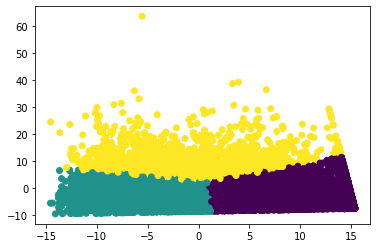

In [115]:
X1 = X.sample(frac = 0.05, random_state = 324) 
#n_clusters=3
km = KMeans(random_state=324,n_clusters=3)
random_km_res=km.fit(X1)

print('\nCluster centers:\n',random_km_res.cluster_centers_)
print('\nSum of squared errors:',random_km_res.inertia_)

pca=PCA(2)
Xproj=pca.fit_transform(X1)
plt.scatter(Xproj[:,0],Xproj[:,1],c=random_km_res.labels_)
plt.show()


In [156]:
X1.shape

(10310, 7)

In [116]:
# split data as train and test 
X_train, X_test, y_train, y_test = train_test_split(X1, random_km_res.labels_, test_size=0.33, random_state=123)


In [117]:
#Using the GridSearchCV to 
param_grid = {'n_estimators':range(1,101,5), 'max_leaf_nodes':range(2,101,5)}#This enables searching over any sequence of parameter settings.
rf = RandomForestClassifier(random_state=3)
gr=GridSearchCV(rf,param_grid=param_grid,scoring='accuracy')
rs=gr.fit(X_train,y_train)
print(rs.best_params_)
print(rs.score(X_test,y_test))

{'max_leaf_nodes': 97, 'n_estimators': 21}
0.9835439318248604


In [231]:
#pip install -U scikit-learn

  Using cached https://files.pythonhosted.org/packages/64/57/23176044d9371e1af286176fd61cf7f74ed46d0b99122624ab93b3f32715/scikit_learn-0.22.2.post1-cp37-cp37m-macosx_10_9_x86_64.whl
  Found existing installation: scikit-learn 0.21.2
    Uninstalling scikit-learn-0.21.2:
      Successfully uninstalled scikit-learn-0.21.2
Note: you may need to restart the kernel to use updated packages.


In [118]:
rf = RandomForestClassifier(n_estimators=rs.best_params_['n_estimators'], n_jobs=-1, max_leaf_nodes=rs.best_params_['max_leaf_nodes'])
rf.fit(X_train, y_train)
pred=rf.predict_proba(X_test)
print(roc_auc_score(y_test,pred, average = 'weighted', multi_class = 'ovr'))


0.9992692314321787


In [165]:
#if using average = 'macro'
print(roc_auc_score(y_test,pred, average = 'macro', multi_class = 'ovr'))


0.9992125363652283


In [167]:
from sklearn.preprocessing import LabelBinarizer

In [125]:
#get feature importances
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
std = np.std([tree.feature_importances_ for tree in rf.estimators_],axis=0)

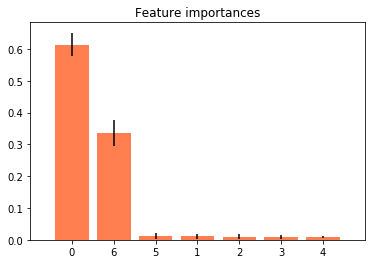

In [142]:
#plot feature importances
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="coral", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [143]:
print([X_train.columns[i] for i in indices])

['days_since_prior_order_mean', 'median_itemsCnt_per_order', 'order_hour_of_day3_cnt_norm', 'order_dow1_cnt_norm', 'order_dow2_cnt_norm', 'order_hour_of_day1_cnt_norm', 'order_hour_of_day2_cnt_norm']


In [136]:
###############################################################
###########   Recommendation System     #######################
###############################################################



###############################################################
##########   Inspired By Moorissa Tjokro  #####################
###############################################################

# https://medium.com/datadriveninvestor/how-to-build-a-recommendation-system-for-purchase-data-step-by-step-d6d7a78800b6

In [169]:
# Pivot table of user_id vs department_id
rs_sample = department_cross_clean.iloc[:10000,]

In [170]:
rs_sample.replace(0, np.nan, inplace = True)

/Users/zehui/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4278: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [171]:
rs_sample.head()

department_id,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,5.0,NaN,NaN,13.0,NaN,NaN,NaN,...,NaN,1.0,3.0,NaN,13.0,2.0,NaN,22.0,NaN,NaN
2,17.0,NaN,2.0,36.0,NaN,3.0,9.0,NaN,NaN,NaN,...,1.0,11.0,3.0,1.0,48.0,NaN,NaN,42.0,21.0,NaN
3,6.0,NaN,NaN,38.0,NaN,NaN,3.0,NaN,4.0,NaN,...,NaN,4.0,NaN,NaN,21.0,1.0,NaN,9.0,2.0,NaN
4,3.0,NaN,2.0,2.0,2.0,NaN,3.0,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,2.0,NaN,1.0,2.0,NaN
5,2.0,NaN,NaN,19.0,NaN,2.0,NaN,NaN,1.0,NaN,...,NaN,2.0,NaN,1.0,8.0,NaN,NaN,1.0,1.0,NaN


In [157]:
# Normalize
rs_norm = (rs_sample - rs_sample.min())/(rs_sample.max() - rs_sample.min())

In [158]:
rs_norm.head()

department_id,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,0.004975,NaN,NaN,0.019355,NaN,NaN,NaN,...,NaN,0.000000,0.00409,NaN,0.017778,0.003559,NaN,0.029330,NaN,NaN
2,0.082474,NaN,0.005435,0.043532,NaN,0.028571,0.012903,NaN,NaN,NaN,...,0.0,0.045455,0.00409,0.0,0.069630,NaN,NaN,0.057263,0.055249,NaN
3,0.025773,NaN,NaN,0.046020,NaN,NaN,0.003226,NaN,0.025,NaN,...,NaN,0.013636,NaN,NaN,0.029630,0.000000,NaN,0.011173,0.002762,NaN
4,0.010309,NaN,0.005435,0.001244,0.004762,NaN,0.003226,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,0.003559,NaN,0.000000,0.002762,NaN
5,0.005155,NaN,NaN,0.022388,NaN,0.014286,NaN,NaN,0.000,NaN,...,NaN,0.004545,NaN,0.0,0.010370,NaN,NaN,0.000000,0.000000,NaN


In [159]:
# Table for input to the model
d = rs_norm.reset_index()
d.index.names = ["scaled_purchase_freq"]
data_norm = pd.melt(d, id_vars = ["user_id"], value_name = "scaled_purchase_freq").dropna()
print(data_norm.shape)
data_norm.head()

(107488, 3)


,user_id,department_id,scaled_purchase_freq
1,2,1,0.082474
2,3,1,0.025773
3,4,1,0.010309
4,5,1,0.005155
6,7,1,0.015464


In [172]:
data_rs = pd.melt(rs_sample.reset_index(), id_vars = ["user_id"], value_name = "scaled_purchase_freq").dropna()

In [137]:
data_norm.tail()

,user_id,department_id,scaled_purchase_freq
209995,9996,21,0.000000
209996,9997,21,0.000000
209997,9998,21,0.018182
209998,9999,21,0.000000
209999,10000,21,0.000000


In [178]:
user_id = 'user_id'
depart_id = 'department_id'
users_to_recommend = list(data_norm["user_id"])
n_rec = 5 # number of items to recommend
n_display = 30 # to display the first few rows in an output dataset

In [143]:
import turicreate as tc

In [150]:
def model(data, name, user_id, depart_id, target, users_to_recommend, n_rec, n_display):
    model = tc.item_similarity_recommender.create(data, 
                                                    user_id=user_id, 
                                                    item_id=depart_id, 
                                                    target=target, 
                                                    similarity_type='pearson')
        
    recom = model.recommend(users=users_to_recommend, k=n_rec)
    recom.print_rows(n_display)
    return model

In [160]:
data_norm = tc.SFrame(data_norm)

In [173]:
data_rs = tc.SFrame(data_rs)

In [161]:
data_norm.head()

user_id,department_id,scaled_purchase_freq
2,1,0.08247422680412371
3,1,0.02577319587628866
4,1,0.010309278350515464
5,1,0.005154639175257732
7,1,0.015463917525773196
9,1,0.0
10,1,0.0
11,1,0.005154639175257732
12,1,0.005154639175257732
14,1,0.17525773195876287


In [162]:
# Using Cosine similarity and sclaed_purchase_freq
name = 'cosine' 
target = 'scaled_purchase_freq' 
cos_norm = model(data_norm, name, user_id, depart_id, target, users_to_recommend, n_rec, n_display)

Preparing data set.

Data has 107488 observations with 10000 users and 21 items.

Data prepared in: 0.139246s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 661us                          | 10         |

| 3.012ms                        | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using dense lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 3.995ms                             | 0                | 0               |

| 10.255ms                            | 100              | 21              |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 0.025955s

recommendations finished on 1000/210000 queries. users per second: 324675

recommendations finished on 2000/210000 queries. users per second: 375305

recommendations finished on 3000/210000 queries. users per second: 361489

recommendations finished on 4000/210000 queries. users per second: 374287

recommendations finished on 5000/210000 queries. users per second: 385119

recommendations finished on 6000/210000 queries. users per second: 384295

recommendations finished on 7000/210000 queries. users per second: 372916

recommendations finished on 8000/210000 queries. users per second: 179590

recommendations finished on 9000/210000 queries. users per second: 181178

recommendations finished on 10000/210000 queries. users per second: 188374

recommendations finished on 11000/210000 queries. users per second: 192688

recommendations finished on 12000/210000 queries. users per second: 202877

recommendations finished on 13000/210000 queries. users per second: 200775

recommendations finished on 14000/210000 queries. users per second: 196282

recommendations finished on 15000/210000 queries. users per second: 201532

recommendations finished on 16000/210000 queries. users per second: 209109

recommendations finished on 17000/210000 queries. users per second: 212628

recommendations finished on 18000/210000 queries. users per second: 220483

recommendations finished on 19000/210000 queries. users per second: 224602

recommendations finished on 20000/210000 queries. users per second: 230582

recommendations finished on 21000/210000 queries. users per second: 234543

recommendations finished on 22000/210000 queries. users per second: 240125

recommendations finished on 23000/210000 queries. users per second: 234814

recommendations finished on 24000/210000 queries. users per second: 237833

recommendations finished on 25000/210000 queries. users per second: 238029

recommendations finished on 26000/210000 queries. users per second: 239312

recommendations finished on 27000/210000 queries. users per second: 241708

recommendations finished on 28000/210000 queries. users per second: 245877

recommendations finished on 29000/210000 queries. users per second: 248859

recommendations finished on 30000/210000 queries. users per second: 249437

recommendations finished on 31000/210000 queries. users per second: 253475

recommendations finished on 32000/210000 queries. users per second: 258692

recommendations finished on 33000/210000 queries. users per second: 261446

recommendations finished on 34000/210000 queries. users per second: 262897

recommendations finished on 35000/210000 queries. users per second: 265968

recommendations finished on 36000/210000 queries. users per second: 267909

recommendations finished on 37000/210000 queries. users per second: 268050

recommendations finished on 38000/210000 queries. users per second: 264709

recommendations finished on 39000/210000 queries. users per second: 263515

recommendations finished on 40000/210000 queries. users per second: 256840

recommendations finished on 41000/210000 queries. users per second: 254676

recommendations finished on 42000/210000 queries. users per second: 257451

recommendations finished on 43000/210000 queries. users per second: 256637

recommendations finished on 44000/210000 queries. users per second: 256814

recommendations finished on 45000/210000 queries. users per second: 258539

recommendations finished on 46000/210000 queries. users per second: 259232

recommendations finished on 47000/210000 queries. users per second: 255185

recommendations finished on 48000/210000 queries. users per second: 257471

recommendations finished on 49000/210000 queries. users per second: 258145

recommendations finished on 50000/210000 queries. users per second: 258494

recommendations finished on 51000/210000 queries. users per second: 261292

recommendations finished on 52000/210000 queries. users per second: 264051

recommendations finished on 53000/210000 queries. users per second: 265988

recommendations finished on 54000/210000 queries. users per second: 268645

recommendations finished on 55000/210000 queries. users per second: 269898

recommendations finished on 56000/210000 queries. users per second: 269041

recommendations finished on 57000/210000 queries. users per second: 267061

recommendations finished on 58000/210000 queries. users per second: 269000

recommendations finished on 59000/210000 queries. users per second: 271585

recommendations finished on 60000/210000 queries. users per second: 271649

recommendations finished on 61000/210000 queries. users per second: 267065

recommendations finished on 62000/210000 queries. users per second: 264722

recommendations finished on 63000/210000 queries. users per second: 263999

recommendations finished on 64000/210000 queries. users per second: 265579

recommendations finished on 65000/210000 queries. users per second: 267439

recommendations finished on 66000/210000 queries. users per second: 269738

recommendations finished on 67000/210000 queries. users per second: 270363

recommendations finished on 68000/210000 queries. users per second: 271444

recommendations finished on 69000/210000 queries. users per second: 273973

recommendations finished on 70000/210000 queries. users per second: 276043

recommendations finished on 71000/210000 queries. users per second: 277689

recommendations finished on 72000/210000 queries. users per second: 273477

recommendations finished on 73000/210000 queries. users per second: 269563

recommendations finished on 74000/210000 queries. users per second: 268892

recommendations finished on 75000/210000 queries. users per second: 270734

recommendations finished on 76000/210000 queries. users per second: 271319

recommendations finished on 77000/210000 queries. users per second: 270411

recommendations finished on 78000/210000 queries. users per second: 271926

recommendations finished on 79000/210000 queries. users per second: 272814

recommendations finished on 80000/210000 queries. users per second: 270302

recommendations finished on 81000/210000 queries. users per second: 271669

recommendations finished on 82000/210000 queries. users per second: 273312

recommendations finished on 83000/210000 queries. users per second: 266476

recommendations finished on 84000/210000 queries. users per second: 266051

recommendations finished on 85000/210000 queries. users per second: 266553

recommendations finished on 86000/210000 queries. users per second: 268060

recommendations finished on 87000/210000 queries. users per second: 268518

recommendations finished on 88000/210000 queries. users per second: 265745

recommendations finished on 90000/210000 queries. users per second: 263440

recommendations finished on 91000/210000 queries. users per second: 263495

recommendations finished on 92000/210000 queries. users per second: 260345

recommendations finished on 89000/210000 queries. users per second: 251738

recommendations finished on 93000/210000 queries. users per second: 261668

recommendations finished on 94000/210000 queries. users per second: 261765

recommendations finished on 95000/210000 queries. users per second: 263209

recommendations finished on 96000/210000 queries. users per second: 264559

recommendations finished on 97000/210000 queries. users per second: 265982

recommendations finished on 98000/210000 queries. users per second: 266569

recommendations finished on 99000/210000 queries. users per second: 267097

recommendations finished on 100000/210000 queries. users per second: 267613

recommendations finished on 101000/210000 queries. users per second: 267749

recommendations finished on 102000/210000 queries. users per second: 268270

recommendations finished on 103000/210000 queries. users per second: 267022

recommendations finished on 104000/210000 queries. users per second: 267841

recommendations finished on 105000/210000 queries. users per second: 267661

recommendations finished on 106000/210000 queries. users per second: 268303

recommendations finished on 107000/210000 queries. users per second: 269225

recommendations finished on 108000/210000 queries. users per second: 269852

recommendations finished on 109000/210000 queries. users per second: 271166

recommendations finished on 110000/210000 queries. users per second: 271382

recommendations finished on 111000/210000 queries. users per second: 272166

recommendations finished on 112000/210000 queries. users per second: 273131

recommendations finished on 113000/210000 queries. users per second: 272755

recommendations finished on 114000/210000 queries. users per second: 273284

recommendations finished on 115000/210000 queries. users per second: 273178

recommendations finished on 116000/210000 queries. users per second: 274121

recommendations finished on 117000/210000 queries. users per second: 272457

recommendations finished on 118000/210000 queries. users per second: 271678

recommendations finished on 119000/210000 queries. users per second: 270799

recommendations finished on 120000/210000 queries. users per second: 271204

recommendations finished on 121000/210000 queries. users per second: 271236

recommendations finished on 122000/210000 queries. users per second: 270945

recommendations finished on 123000/210000 queries. users per second: 270630

recommendations finished on 124000/210000 queries. users per second: 270891

recommendations finished on 125000/210000 queries. users per second: 272086

recommendations finished on 126000/210000 queries. users per second: 270855

recommendations finished on 127000/210000 queries. users per second: 271833

recommendations finished on 128000/210000 queries. users per second: 273016

recommendations finished on 129000/210000 queries. users per second: 273889

recommendations finished on 130000/210000 queries. users per second: 275242

recommendations finished on 131000/210000 queries. users per second: 276555

recommendations finished on 132000/210000 queries. users per second: 277359

recommendations finished on 133000/210000 queries. users per second: 278021

recommendations finished on 134000/210000 queries. users per second: 278970

recommendations finished on 135000/210000 queries. users per second: 280119

recommendations finished on 136000/210000 queries. users per second: 281352

recommendations finished on 137000/210000 queries. users per second: 282570

recommendations finished on 138000/210000 queries. users per second: 283536

recommendations finished on 139000/210000 queries. users per second: 284696

recommendations finished on 140000/210000 queries. users per second: 285587

recommendations finished on 141000/210000 queries. users per second: 286523

recommendations finished on 142000/210000 queries. users per second: 287276

recommendations finished on 143000/210000 queries. users per second: 288014

recommendations finished on 144000/210000 queries. users per second: 288969

recommendations finished on 145000/210000 queries. users per second: 289819

recommendations finished on 146000/210000 queries. users per second: 289962

recommendations finished on 147000/210000 queries. users per second: 289693

recommendations finished on 148000/210000 queries. users per second: 290406

recommendations finished on 149000/210000 queries. users per second: 290603

recommendations finished on 150000/210000 queries. users per second: 291047

recommendations finished on 151000/210000 queries. users per second: 290817

recommendations finished on 152000/210000 queries. users per second: 291471

recommendations finished on 153000/210000 queries. users per second: 292215

recommendations finished on 154000/210000 queries. users per second: 291584

recommendations finished on 155000/210000 queries. users per second: 292203

recommendations finished on 156000/210000 queries. users per second: 292925

recommendations finished on 157000/210000 queries. users per second: 291372

recommendations finished on 158000/210000 queries. users per second: 291705

recommendations finished on 159000/210000 queries. users per second: 292615

recommendations finished on 160000/210000 queries. users per second: 293278

recommendations finished on 161000/210000 queries. users per second: 292899

recommendations finished on 162000/210000 queries. users per second: 293409

recommendations finished on 163000/210000 queries. users per second: 293838

recommendations finished on 164000/210000 queries. users per second: 294727

recommendations finished on 165000/210000 queries. users per second: 294458

recommendations finished on 166000/210000 queries. users per second: 294715

recommendations finished on 167000/210000 queries. users per second: 295419

recommendations finished on 168000/210000 queries. users per second: 296110

recommendations finished on 169000/210000 queries. users per second: 296683

recommendations finished on 170000/210000 queries. users per second: 297048

recommendations finished on 171000/210000 queries. users per second: 297591

recommendations finished on 172000/210000 queries. users per second: 298221

recommendations finished on 173000/210000 queries. users per second: 298536

recommendations finished on 174000/210000 queries. users per second: 299187

recommendations finished on 175000/210000 queries. users per second: 299258

recommendations finished on 176000/210000 queries. users per second: 298283

recommendations finished on 177000/210000 queries. users per second: 294270

recommendations finished on 178000/210000 queries. users per second: 282832

recommendations finished on 179000/210000 queries. users per second: 282987

recommendations finished on 180000/210000 queries. users per second: 283415

recommendations finished on 181000/210000 queries. users per second: 282538

recommendations finished on 182000/210000 queries. users per second: 282904

recommendations finished on 183000/210000 queries. users per second: 283445

recommendations finished on 184000/210000 queries. users per second: 283023

recommendations finished on 185000/210000 queries. users per second: 283823

recommendations finished on 186000/210000 queries. users per second: 283924

recommendations finished on 187000/210000 queries. users per second: 284043

recommendations finished on 188000/210000 queries. users per second: 284668

recommendations finished on 189000/210000 queries. users per second: 285320

recommendations finished on 190000/210000 queries. users per second: 285488

recommendations finished on 191000/210000 queries. users per second: 285587

recommendations finished on 192000/210000 queries. users per second: 285066

recommendations finished on 193000/210000 queries. users per second: 284738

recommendations finished on 194000/210000 queries. users per second: 284687

recommendations finished on 195000/210000 queries. users per second: 284877

recommendations finished on 196000/210000 queries. users per second: 284250

recommendations finished on 197000/210000 queries. users per second: 284728

recommendations finished on 198000/210000 queries. users per second: 284565

recommendations finished on 199000/210000 queries. users per second: 283673

recommendations finished on 200000/210000 queries. users per second: 283823

recommendations finished on 201000/210000 queries. users per second: 280401

recommendations finished on 202000/210000 queries. users per second: 280772

recommendations finished on 203000/210000 queries. users per second: 280831

recommendations finished on 204000/210000 queries. users per second: 280974

recommendations finished on 205000/210000 queries. users per second: 279984

recommendations finished on 206000/210000 queries. users per second: 279632

recommendations finished on 207000/210000 queries. users per second: 279271

recommendations finished on 208000/210000 queries. users per second: 278974

recommendations finished on 209000/210000 queries. users per second: 276394

recommendations finished on 210000/210000 queries. users per second: 275000

+---------+---------------+-----------------------+------+
| user_id | department_id |         score         | rank |
+---------+---------------+-----------------------+------+
|    1    |       20      |  0.006485053471156529 |  1   |
|    1    |       3       | 0.0064370036125183105 |  2   |
|    1    |       1       |  0.005931488105228969 |  3   |
|    1    |       9       | 0.0054250189236232215 |  4   |
|    1    |       15      |  0.005082113402230399 |  5   |
|    1    |       12      |  0.004921879087175641 |  6   |
|    1    |       11      | 0.0043566056660243446 |  7   |
|    1    |       6       |  0.004169966493334089 |  8   |
|    1    |       18      |  0.002666107245853969 |  9   |
|    1    |       21      | 0.0024454593658447266 |  10  |
|    2    |       9       |  0.017091246751638558 |  1   |
|    2    |       17      |  0.010590475339155931 |  2   |
|    2    |       18      |  0.007967164883246789 |  3   |
|    2    |       21      |  0.006143235243283785 |  4  

In [163]:
name = 'pearson' 
target = 'scaled_purchase_freq' 
pearson_norm = model(data_norm, name, user_id, depart_id, target, users_to_recommend, n_rec, n_display)

Preparing data set.

Data has 107488 observations with 10000 users and 21 items.

Data prepared in: 0.130123s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 2.534ms                        | 10         |

| 7.031ms                        | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using dense lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 7.684ms                             | 0                | 0               |

| 21.2ms                              | 100              | 21              |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 0.037044s

recommendations finished on 1000/210000 queries. users per second: 346620

recommendations finished on 2000/210000 queries. users per second: 452591

recommendations finished on 3000/210000 queries. users per second: 494397

recommendations finished on 4000/210000 queries. users per second: 472534

recommendations finished on 5000/210000 queries. users per second: 477509

recommendations finished on 6000/210000 queries. users per second: 464828

recommendations finished on 7000/210000 queries. users per second: 475996

recommendations finished on 8000/210000 queries. users per second: 489956

recommendations finished on 9000/210000 queries. users per second: 488705

recommendations finished on 10000/210000 queries. users per second: 499151

recommendations finished on 11000/210000 queries. users per second: 499796

recommendations finished on 12000/210000 queries. users per second: 483520

recommendations finished on 13000/210000 queries. users per second: 477924

recommendations finished on 14000/210000 queries. users per second: 468494

recommendations finished on 15000/210000 queries. users per second: 472977

recommendations finished on 16000/210000 queries. users per second: 478999

recommendations finished on 17000/210000 queries. users per second: 472800

recommendations finished on 18000/210000 queries. users per second: 464348

recommendations finished on 19000/210000 queries. users per second: 471207

recommendations finished on 20000/210000 queries. users per second: 479582

recommendations finished on 21000/210000 queries. users per second: 488895

recommendations finished on 22000/210000 queries. users per second: 490885

recommendations finished on 23000/210000 queries. users per second: 492949

recommendations finished on 24000/210000 queries. users per second: 489766

recommendations finished on 25000/210000 queries. users per second: 494834

recommendations finished on 26000/210000 queries. users per second: 495455

recommendations finished on 27000/210000 queries. users per second: 496789

recommendations finished on 28000/210000 queries. users per second: 492161

recommendations finished on 29000/210000 queries. users per second: 482762

recommendations finished on 30000/210000 queries. users per second: 482307

recommendations finished on 31000/210000 queries. users per second: 482085

recommendations finished on 32000/210000 queries. users per second: 476723

recommendations finished on 33000/210000 queries. users per second: 473539

recommendations finished on 34000/210000 queries. users per second: 474363

recommendations finished on 35000/210000 queries. users per second: 475298

recommendations finished on 36000/210000 queries. users per second: 475763

recommendations finished on 37000/210000 queries. users per second: 477167

recommendations finished on 38000/210000 queries. users per second: 478060

recommendations finished on 39000/210000 queries. users per second: 469229

recommendations finished on 40000/210000 queries. users per second: 448979

recommendations finished on 41000/210000 queries. users per second: 438972

recommendations finished on 42000/210000 queries. users per second: 434378

recommendations finished on 43000/210000 queries. users per second: 423695

recommendations finished on 44000/210000 queries. users per second: 411119

recommendations finished on 45000/210000 queries. users per second: 402432

recommendations finished on 46000/210000 queries. users per second: 394816

recommendations finished on 47000/210000 queries. users per second: 389392

recommendations finished on 48000/210000 queries. users per second: 360509

recommendations finished on 49000/210000 queries. users per second: 355549

recommendations finished on 50000/210000 queries. users per second: 354771

recommendations finished on 51000/210000 queries. users per second: 356324

recommendations finished on 52000/210000 queries. users per second: 355558

recommendations finished on 53000/210000 queries. users per second: 356427

recommendations finished on 54000/210000 queries. users per second: 354976

recommendations finished on 55000/210000 queries. users per second: 356229

recommendations finished on 56000/210000 queries. users per second: 357674

recommendations finished on 57000/210000 queries. users per second: 355056

recommendations finished on 58000/210000 queries. users per second: 353146

recommendations finished on 59000/210000 queries. users per second: 353579

recommendations finished on 60000/210000 queries. users per second: 351952

recommendations finished on 61000/210000 queries. users per second: 351828

recommendations finished on 62000/210000 queries. users per second: 349445

recommendations finished on 63000/210000 queries. users per second: 349617

recommendations finished on 64000/210000 queries. users per second: 346669

recommendations finished on 65000/210000 queries. users per second: 345397

recommendations finished on 66000/210000 queries. users per second: 345526

recommendations finished on 67000/210000 queries. users per second: 347384

recommendations finished on 68000/210000 queries. users per second: 349535

recommendations finished on 69000/210000 queries. users per second: 351272

recommendations finished on 70000/210000 queries. users per second: 353719

recommendations finished on 71000/210000 queries. users per second: 353631

recommendations finished on 72000/210000 queries. users per second: 355326

recommendations finished on 73000/210000 queries. users per second: 346282

recommendations finished on 74000/210000 queries. users per second: 346332

recommendations finished on 75000/210000 queries. users per second: 346097

recommendations finished on 76000/210000 queries. users per second: 345940

recommendations finished on 77000/210000 queries. users per second: 345281

recommendations finished on 78000/210000 queries. users per second: 345153

recommendations finished on 79000/210000 queries. users per second: 344933

recommendations finished on 80000/210000 queries. users per second: 345298

recommendations finished on 81000/210000 queries. users per second: 346099

recommendations finished on 82000/210000 queries. users per second: 347434

recommendations finished on 83000/210000 queries. users per second: 345360

recommendations finished on 84000/210000 queries. users per second: 343758

recommendations finished on 85000/210000 queries. users per second: 341974

recommendations finished on 86000/210000 queries. users per second: 341845

recommendations finished on 87000/210000 queries. users per second: 342856

recommendations finished on 88000/210000 queries. users per second: 341409

recommendations finished on 89000/210000 queries. users per second: 339616

recommendations finished on 90000/210000 queries. users per second: 336491

recommendations finished on 91000/210000 queries. users per second: 335458

recommendations finished on 92000/210000 queries. users per second: 333550

recommendations finished on 94000/210000 queries. users per second: 332197

recommendations finished on 93000/210000 queries. users per second: 334066

recommendations finished on 95000/210000 queries. users per second: 332747

recommendations finished on 96000/210000 queries. users per second: 333168

recommendations finished on 97000/210000 queries. users per second: 333785

recommendations finished on 98000/210000 queries. users per second: 334054

recommendations finished on 99000/210000 queries. users per second: 331404

recommendations finished on 100000/210000 queries. users per second: 329489

recommendations finished on 101000/210000 queries. users per second: 330792

recommendations finished on 102000/210000 queries. users per second: 331454

recommendations finished on 103000/210000 queries. users per second: 332470

recommendations finished on 104000/210000 queries. users per second: 332892

recommendations finished on 105000/210000 queries. users per second: 334229

recommendations finished on 106000/210000 queries. users per second: 335490

recommendations finished on 107000/210000 queries. users per second: 336316

recommendations finished on 108000/210000 queries. users per second: 336571

recommendations finished on 109000/210000 queries. users per second: 323606

recommendations finished on 110000/210000 queries. users per second: 324216

recommendations finished on 111000/210000 queries. users per second: 324981

recommendations finished on 112000/210000 queries. users per second: 325232

recommendations finished on 113000/210000 queries. users per second: 325466

recommendations finished on 114000/210000 queries. users per second: 324141

recommendations finished on 115000/210000 queries. users per second: 324175

recommendations finished on 116000/210000 queries. users per second: 325117

recommendations finished on 117000/210000 queries. users per second: 322895

recommendations finished on 118000/210000 queries. users per second: 317912

recommendations finished on 119000/210000 queries. users per second: 316883

recommendations finished on 120000/210000 queries. users per second: 316669

recommendations finished on 121000/210000 queries. users per second: 316458

recommendations finished on 122000/210000 queries. users per second: 315649

recommendations finished on 123000/210000 queries. users per second: 315267

recommendations finished on 124000/210000 queries. users per second: 314073

recommendations finished on 125000/210000 queries. users per second: 311818

recommendations finished on 126000/210000 queries. users per second: 287374

recommendations finished on 127000/210000 queries. users per second: 288137

recommendations finished on 128000/210000 queries. users per second: 289120

recommendations finished on 129000/210000 queries. users per second: 290077

recommendations finished on 130000/210000 queries. users per second: 290571

recommendations finished on 131000/210000 queries. users per second: 286027

recommendations finished on 132000/210000 queries. users per second: 287298

recommendations finished on 133000/210000 queries. users per second: 288444

recommendations finished on 134000/210000 queries. users per second: 289082

recommendations finished on 135000/210000 queries. users per second: 289689

recommendations finished on 136000/210000 queries. users per second: 289931

recommendations finished on 137000/210000 queries. users per second: 290306

recommendations finished on 138000/210000 queries. users per second: 291154

recommendations finished on 139000/210000 queries. users per second: 291994

recommendations finished on 140000/210000 queries. users per second: 292977

recommendations finished on 141000/210000 queries. users per second: 292076

recommendations finished on 142000/210000 queries. users per second: 288599

recommendations finished on 143000/210000 queries. users per second: 286021

recommendations finished on 144000/210000 queries. users per second: 286585

recommendations finished on 145000/210000 queries. users per second: 285916

recommendations finished on 146000/210000 queries. users per second: 284601

recommendations finished on 147000/210000 queries. users per second: 284191

recommendations finished on 148000/210000 queries. users per second: 283536

recommendations finished on 149000/210000 queries. users per second: 283738

recommendations finished on 150000/210000 queries. users per second: 282476

recommendations finished on 151000/210000 queries. users per second: 282991

recommendations finished on 152000/210000 queries. users per second: 283654

recommendations finished on 153000/210000 queries. users per second: 284334

recommendations finished on 154000/210000 queries. users per second: 285467

recommendations finished on 155000/210000 queries. users per second: 286520

recommendations finished on 156000/210000 queries. users per second: 287366

recommendations finished on 157000/210000 queries. users per second: 288161

recommendations finished on 158000/210000 queries. users per second: 289155

recommendations finished on 159000/210000 queries. users per second: 290082

recommendations finished on 160000/210000 queries. users per second: 290959

recommendations finished on 161000/210000 queries. users per second: 290875

recommendations finished on 162000/210000 queries. users per second: 291601

recommendations finished on 163000/210000 queries. users per second: 292430

recommendations finished on 164000/210000 queries. users per second: 292991

recommendations finished on 165000/210000 queries. users per second: 293678

recommendations finished on 166000/210000 queries. users per second: 294659

recommendations finished on 167000/210000 queries. users per second: 295000

recommendations finished on 168000/210000 queries. users per second: 294450

recommendations finished on 169000/210000 queries. users per second: 293051

recommendations finished on 170000/210000 queries. users per second: 292113

recommendations finished on 171000/210000 queries. users per second: 291845

recommendations finished on 172000/210000 queries. users per second: 292245

recommendations finished on 173000/210000 queries. users per second: 291789

recommendations finished on 174000/210000 queries. users per second: 292268

recommendations finished on 175000/210000 queries. users per second: 292920

recommendations finished on 176000/210000 queries. users per second: 293291

recommendations finished on 177000/210000 queries. users per second: 292829

recommendations finished on 178000/210000 queries. users per second: 292156

recommendations finished on 179000/210000 queries. users per second: 291459

recommendations finished on 180000/210000 queries. users per second: 290511

recommendations finished on 181000/210000 queries. users per second: 288683

recommendations finished on 182000/210000 queries. users per second: 287910

recommendations finished on 183000/210000 queries. users per second: 287153

recommendations finished on 184000/210000 queries. users per second: 282845

recommendations finished on 185000/210000 queries. users per second: 279694

recommendations finished on 186000/210000 queries. users per second: 278911

recommendations finished on 187000/210000 queries. users per second: 278908

recommendations finished on 188000/210000 queries. users per second: 278908

recommendations finished on 189000/210000 queries. users per second: 278889

recommendations finished on 190000/210000 queries. users per second: 279305

recommendations finished on 191000/210000 queries. users per second: 279417

recommendations finished on 192000/210000 queries. users per second: 279213

recommendations finished on 193000/210000 queries. users per second: 277756

recommendations finished on 194000/210000 queries. users per second: 277892

recommendations finished on 195000/210000 queries. users per second: 278238

recommendations finished on 196000/210000 queries. users per second: 278664

recommendations finished on 197000/210000 queries. users per second: 279070

recommendations finished on 198000/210000 queries. users per second: 278931

recommendations finished on 199000/210000 queries. users per second: 278833

recommendations finished on 200000/210000 queries. users per second: 278803

recommendations finished on 201000/210000 queries. users per second: 279025

recommendations finished on 202000/210000 queries. users per second: 279144

recommendations finished on 203000/210000 queries. users per second: 278809

recommendations finished on 204000/210000 queries. users per second: 278569

recommendations finished on 205000/210000 queries. users per second: 278207

recommendations finished on 206000/210000 queries. users per second: 277643

recommendations finished on 207000/210000 queries. users per second: 278015

recommendations finished on 208000/210000 queries. users per second: 277832

recommendations finished on 209000/210000 queries. users per second: 276157

recommendations finished on 210000/210000 queries. users per second: 273363

+---------+---------------+----------------------+------+
| user_id | department_id |        score         | rank |
+---------+---------------+----------------------+------+
|    1    |       12      | 0.05976207386591055  |  1   |
|    1    |       1       |  0.0549572109323951  |  2   |
|    1    |       9       | 0.03948992370231094  |  3   |
|    1    |       5       | 0.036175910479217956 |  4   |
|    1    |       10      | 0.03573141761312243  |  5   |
|    1    |       3       | 0.030884250241282236 |  6   |
|    1    |       6       | 0.030147741789511552 |  7   |
|    1    |       21      | 0.02740860944071774  |  8   |
|    1    |       15      | 0.026857078090249648 |  9   |
|    1    |       18      | 0.024007948825323106 |  10  |
|    2    |       9       | 0.045595894907676474 |  1   |
|    2    |       10      | 0.03709835320162374  |  2   |
|    2    |       5       | 0.036837854119245686 |  3   |
|    2    |       21      | 0.02921286430793609  |  4   |
|    2    |   

In [176]:
user_items_types_sample = user_items_types.iloc[:10000,]
user_items_types_sample.head()

,user_id,department_id,unique_departments,max_freq_departments,max_freq_departments_cnt
0,1,"[7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 16, 19, 19, 19,...",7,[19],22
1,2,"[4, 4, 4, 19, 19, 19, 19, 19, 19, 19, 19, 19, ...",13,[16],48
2,3,"[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, ...",9,[4],38
3,4,"[4, 4, 3, 7, 1, 1, 17, 5, 17, 15, 7, 3, 1, 5, ...",9,"[7, 1]",3
4,5,"[20, 13, 6, 6, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4...",9,[4],19


In [179]:
final_model = tc.item_similarity_recommender.create(tc.SFrame(data_norm), 
                                            user_id=user_id, 
                                            item_id=depart_id, 
                                            target='scaled_purchase_freq', similarity_type='pearson')
recom = final_model.recommend(users=users_to_recommend, k=n_rec)
recom.print_rows(n_display)

Preparing data set.

Data has 107488 observations with 10000 users and 21 items.

Data prepared in: 0.103023s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 934us                          | 10         |

| 6.311ms                        | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using dense lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 7.392ms                             | 0                | 0               |

| 27.764ms                            | 100              | 21              |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 0.047261s

recommendations finished on 1000/107488 queries. users per second: 317561

recommendations finished on 2000/107488 queries. users per second: 451060

recommendations finished on 3000/107488 queries. users per second: 495376

recommendations finished on 4000/107488 queries. users per second: 525279

recommendations finished on 5000/107488 queries. users per second: 527649

recommendations finished on 6000/107488 queries. users per second: 545951

recommendations finished on 7000/107488 queries. users per second: 533415

recommendations finished on 8000/107488 queries. users per second: 540614

recommendations finished on 9000/107488 queries. users per second: 526193

recommendations finished on 10000/107488 queries. users per second: 526482

recommendations finished on 11000/107488 queries. users per second: 529457

recommendations finished on 12000/107488 queries. users per second: 524980

recommendations finished on 13000/107488 queries. users per second: 517145

recommendations finished on 14000/107488 queries. users per second: 511303

recommendations finished on 15000/107488 queries. users per second: 518296

recommendations finished on 16000/107488 queries. users per second: 522534

recommendations finished on 17000/107488 queries. users per second: 531399

recommendations finished on 18000/107488 queries. users per second: 536513

recommendations finished on 19000/107488 queries. users per second: 538686

recommendations finished on 20000/107488 queries. users per second: 546269

recommendations finished on 21000/107488 queries. users per second: 541894

recommendations finished on 22000/107488 queries. users per second: 534733

recommendations finished on 23000/107488 queries. users per second: 525750

recommendations finished on 24000/107488 queries. users per second: 516796

recommendations finished on 25000/107488 queries. users per second: 515772

recommendations finished on 26000/107488 queries. users per second: 510996

recommendations finished on 27000/107488 queries. users per second: 516717

recommendations finished on 28000/107488 queries. users per second: 515891

recommendations finished on 29000/107488 queries. users per second: 517072

recommendations finished on 30000/107488 queries. users per second: 516849

recommendations finished on 31000/107488 queries. users per second: 508622

recommendations finished on 32000/107488 queries. users per second: 511812

recommendations finished on 33000/107488 queries. users per second: 517972

recommendations finished on 34000/107488 queries. users per second: 521392

recommendations finished on 35000/107488 queries. users per second: 517606

recommendations finished on 36000/107488 queries. users per second: 504527

recommendations finished on 37000/107488 queries. users per second: 501111

recommendations finished on 38000/107488 queries. users per second: 505716

recommendations finished on 39000/107488 queries. users per second: 507971

recommendations finished on 40000/107488 queries. users per second: 508641

recommendations finished on 41000/107488 queries. users per second: 497337

recommendations finished on 42000/107488 queries. users per second: 496571

recommendations finished on 43000/107488 queries. users per second: 501294

recommendations finished on 44000/107488 queries. users per second: 505439

recommendations finished on 45000/107488 queries. users per second: 508078

recommendations finished on 46000/107488 queries. users per second: 509526

recommendations finished on 47000/107488 queries. users per second: 510055

recommendations finished on 48000/107488 queries. users per second: 511013

recommendations finished on 49000/107488 queries. users per second: 500838

recommendations finished on 50000/107488 queries. users per second: 496455

recommendations finished on 51000/107488 queries. users per second: 494172

recommendations finished on 52000/107488 queries. users per second: 495762

recommendations finished on 53000/107488 queries. users per second: 498828

recommendations finished on 54000/107488 queries. users per second: 498523

recommendations finished on 55000/107488 queries. users per second: 499292

recommendations finished on 56000/107488 queries. users per second: 500375

recommendations finished on 57000/107488 queries. users per second: 501244

recommendations finished on 58000/107488 queries. users per second: 500578

recommendations finished on 59000/107488 queries. users per second: 496207

recommendations finished on 60000/107488 queries. users per second: 495638

recommendations finished on 61000/107488 queries. users per second: 496238

recommendations finished on 62000/107488 queries. users per second: 497976

recommendations finished on 63000/107488 queries. users per second: 498343

recommendations finished on 64000/107488 queries. users per second: 498446

recommendations finished on 65000/107488 queries. users per second: 498493

recommendations finished on 66000/107488 queries. users per second: 499308

recommendations finished on 67000/107488 queries. users per second: 499631

recommendations finished on 68000/107488 queries. users per second: 498231

recommendations finished on 69000/107488 queries. users per second: 496968

recommendations finished on 70000/107488 queries. users per second: 483937

recommendations finished on 71000/107488 queries. users per second: 484423

recommendations finished on 72000/107488 queries. users per second: 484271

recommendations finished on 73000/107488 queries. users per second: 481191

recommendations finished on 74000/107488 queries. users per second: 479902

recommendations finished on 75000/107488 queries. users per second: 481393

recommendations finished on 76000/107488 queries. users per second: 484070

recommendations finished on 77000/107488 queries. users per second: 485624

recommendations finished on 78000/107488 queries. users per second: 482859

recommendations finished on 79000/107488 queries. users per second: 483384

recommendations finished on 80000/107488 queries. users per second: 485298

recommendations finished on 81000/107488 queries. users per second: 482611

recommendations finished on 82000/107488 queries. users per second: 481455

recommendations finished on 83000/107488 queries. users per second: 483587

recommendations finished on 84000/107488 queries. users per second: 484362

recommendations finished on 85000/107488 queries. users per second: 482998

recommendations finished on 86000/107488 queries. users per second: 479341

recommendations finished on 87000/107488 queries. users per second: 479579

recommendations finished on 88000/107488 queries. users per second: 479933

recommendations finished on 89000/107488 queries. users per second: 481331

recommendations finished on 90000/107488 queries. users per second: 468323

recommendations finished on 91000/107488 queries. users per second: 468023

recommendations finished on 92000/107488 queries. users per second: 467005

recommendations finished on 93000/107488 queries. users per second: 466128

recommendations finished on 94000/107488 queries. users per second: 463246

recommendations finished on 95000/107488 queries. users per second: 452914

recommendations finished on 96000/107488 queries. users per second: 450651

recommendations finished on 97000/107488 queries. users per second: 450223

recommendations finished on 98000/107488 queries. users per second: 450956

recommendations finished on 99000/107488 queries. users per second: 447371

recommendations finished on 100000/107488 queries. users per second: 422256

recommendations finished on 101000/107488 queries. users per second: 416440

recommendations finished on 102000/107488 queries. users per second: 415590

recommendations finished on 103000/107488 queries. users per second: 409686

recommendations finished on 104000/107488 queries. users per second: 406163

recommendations finished on 105000/107488 queries. users per second: 398679

recommendations finished on 106000/107488 queries. users per second: 393284

recommendations finished on 107000/107488 queries. users per second: 383341

+---------+---------------+----------------------+------+
| user_id | department_id |        score         | rank |
+---------+---------------+----------------------+------+
|    2    |       9       | 0.045595894907676564 |  1   |
|    2    |       10      | 0.03709835320162373  |  2   |
|    2    |       5       | 0.03683785411924565  |  3   |
|    2    |       21      | 0.02921286430793611  |  4   |
|    2    |       18      | 0.02654888435216044  |  5   |
|    3    |       12      | 0.061127884971668656 |  1   |
|    3    |       5       | 0.03612370437923846  |  2   |
|    3    |       10      | 0.03579834889867782  |  3   |
|    3    |       3       | 0.03162397605053096  |  4   |
|    3    |       6       | 0.03073410768606961  |  5   |
|    4    |       12      | 0.05788664399342769  |  1   |
|    4    |       9       | 0.03669518017197705  |  2   |
|    4    |       10      | 0.035260979912336135 |  3   |
|    4    |       13      | 0.030475874809106837 |  4   |
|    4    |   

In [180]:
df_rec = recom.to_dataframe()
print(df_rec.shape)
df_rec.head()

(528197, 4)


,user_id,department_id,score,rank
0,2,9,0.045596,1
1,2,10,0.037098,2
2,2,5,0.036838,3
3,2,21,0.029213,4
4,2,18,0.026549,5


In [186]:
df_rec.head(20)

,user_id,department_id,score,rank
0,2,9,0.045596,1
1,2,10,0.037098,2
2,2,5,0.036838,3
3,2,21,0.029213,4
4,2,18,0.026549,5
5,3,12,0.061128,1
6,3,5,0.036124,2
7,3,10,0.035798,3
8,3,3,0.031624,4
9,3,6,0.030734,5


In [189]:
def create_output(model, users_to_recommend, n_rec, print_csv=True):
    recomendation = model.recommend(users=users_to_recommend, k=n_rec)
    df_rec = recom.to_dataframe()
    rec_depart = df_rec.groupby(["user_id"])["department_id"] \
        .transform(lambda x: ','.join(x.astype(str)))
    df_output = df_rec[['user_id', 'recommendedDepartments']].drop_duplicates() \
        .sort_values('user_id').set_index('user_id')
    if print_csv:
        df_output.to_csv('recommendation.csv')
        print("CSV succeed")
    return df_output

In [190]:
df_output = create_output(pearson_norm, users_to_recommend, n_rec, print_csv=True)
print(df_output.shape)
df_output.head()

recommendations finished on 1000/107488 queries. users per second: 360231

recommendations finished on 2000/107488 queries. users per second: 427350

recommendations finished on 3000/107488 queries. users per second: 452011

recommendations finished on 4000/107488 queries. users per second: 483384

recommendations finished on 5000/107488 queries. users per second: 505919

recommendations finished on 6000/107488 queries. users per second: 502302

recommendations finished on 7000/107488 queries. users per second: 508167

recommendations finished on 8000/107488 queries. users per second: 493553

recommendations finished on 9000/107488 queries. users per second: 502793

recommendations finished on 10000/107488 queries. users per second: 504236

recommendations finished on 11000/107488 queries. users per second: 488563

recommendations finished on 12000/107488 queries. users per second: 493746

recommendations finished on 13000/107488 queries. users per second: 505188

recommendations finished on 14000/107488 queries. users per second: 504323

recommendations finished on 15000/107488 queries. users per second: 503322

recommendations finished on 16000/107488 queries. users per second: 508728

recommendations finished on 17000/107488 queries. users per second: 500854

recommendations finished on 18000/107488 queries. users per second: 501253

recommendations finished on 19000/107488 queries. users per second: 493289

recommendations finished on 20000/107488 queries. users per second: 497364

recommendations finished on 21000/107488 queries. users per second: 500703

recommendations finished on 22000/107488 queries. users per second: 507322

recommendations finished on 23000/107488 queries. users per second: 512056

recommendations finished on 24000/107488 queries. users per second: 513622

recommendations finished on 25000/107488 queries. users per second: 511331

recommendations finished on 26000/107488 queries. users per second: 515300

recommendations finished on 27000/107488 queries. users per second: 519481

recommendations finished on 28000/107488 queries. users per second: 509369

recommendations finished on 29000/107488 queries. users per second: 509111

recommendations finished on 30000/107488 queries. users per second: 508759

recommendations finished on 31000/107488 queries. users per second: 511830

recommendations finished on 32000/107488 queries. users per second: 516046

recommendations finished on 33000/107488 queries. users per second: 518127

recommendations finished on 34000/107488 queries. users per second: 516106

recommendations finished on 35000/107488 queries. users per second: 513761

recommendations finished on 36000/107488 queries. users per second: 511117

recommendations finished on 37000/107488 queries. users per second: 510134

recommendations finished on 38000/107488 queries. users per second: 507716

recommendations finished on 39000/107488 queries. users per second: 510411

recommendations finished on 40000/107488 queries. users per second: 511653

recommendations finished on 41000/107488 queries. users per second: 514804

recommendations finished on 42000/107488 queries. users per second: 514706

recommendations finished on 43000/107488 queries. users per second: 512167

recommendations finished on 44000/107488 queries. users per second: 511497

recommendations finished on 45000/107488 queries. users per second: 509390

recommendations finished on 46000/107488 queries. users per second: 503789

recommendations finished on 47000/107488 queries. users per second: 502276

recommendations finished on 48000/107488 queries. users per second: 501326

recommendations finished on 49000/107488 queries. users per second: 504069

recommendations finished on 50000/107488 queries. users per second: 504770

recommendations finished on 51000/107488 queries. users per second: 501268

recommendations finished on 52000/107488 queries. users per second: 503495

recommendations finished on 53000/107488 queries. users per second: 507527

recommendations finished on 54000/107488 queries. users per second: 506481

recommendations finished on 55000/107488 queries. users per second: 501669

recommendations finished on 56000/107488 queries. users per second: 501181

recommendations finished on 57000/107488 queries. users per second: 500637

recommendations finished on 58000/107488 queries. users per second: 498290

recommendations finished on 59000/107488 queries. users per second: 498046

recommendations finished on 60000/107488 queries. users per second: 497500

recommendations finished on 61000/107488 queries. users per second: 498163

recommendations finished on 62000/107488 queries. users per second: 499022

recommendations finished on 63000/107488 queries. users per second: 493688

recommendations finished on 64000/107488 queries. users per second: 491948

recommendations finished on 65000/107488 queries. users per second: 492846

recommendations finished on 66000/107488 queries. users per second: 492137

recommendations finished on 67000/107488 queries. users per second: 492538

recommendations finished on 68000/107488 queries. users per second: 492062

recommendations finished on 69000/107488 queries. users per second: 490942

recommendations finished on 70000/107488 queries. users per second: 491673

recommendations finished on 71000/107488 queries. users per second: 493436

recommendations finished on 72000/107488 queries. users per second: 493411

recommendations finished on 73000/107488 queries. users per second: 490667

recommendations finished on 74000/107488 queries. users per second: 486583

recommendations finished on 75000/107488 queries. users per second: 484556

recommendations finished on 76000/107488 queries. users per second: 481074

recommendations finished on 77000/107488 queries. users per second: 478184

recommendations finished on 78000/107488 queries. users per second: 475935

recommendations finished on 79000/107488 queries. users per second: 474688

recommendations finished on 80000/107488 queries. users per second: 469519

recommendations finished on 81000/107488 queries. users per second: 463907

recommendations finished on 82000/107488 queries. users per second: 458014

recommendations finished on 83000/107488 queries. users per second: 452457

recommendations finished on 84000/107488 queries. users per second: 444219

recommendations finished on 85000/107488 queries. users per second: 431002

recommendations finished on 86000/107488 queries. users per second: 407394

recommendations finished on 87000/107488 queries. users per second: 401985

recommendations finished on 88000/107488 queries. users per second: 394805

recommendations finished on 89000/107488 queries. users per second: 392698

recommendations finished on 90000/107488 queries. users per second: 381049

recommendations finished on 91000/107488 queries. users per second: 370486

recommendations finished on 92000/107488 queries. users per second: 368643

recommendations finished on 93000/107488 queries. users per second: 358702

recommendations finished on 94000/107488 queries. users per second: 357921

recommendations finished on 95000/107488 queries. users per second: 359119

recommendations finished on 96000/107488 queries. users per second: 360181

recommendations finished on 97000/107488 queries. users per second: 359867

recommendations finished on 98000/107488 queries. users per second: 361080

recommendations finished on 99000/107488 queries. users per second: 361586

recommendations finished on 101000/107488 queries. users per second: 363536

recommendations finished on 102000/107488 queries. users per second: 362222

recommendations finished on 100000/107488 queries. users per second: 362822

recommendations finished on 103000/107488 queries. users per second: 361998

recommendations finished on 104000/107488 queries. users per second: 359291

recommendations finished on 105000/107488 queries. users per second: 356273

recommendations finished on 106000/107488 queries. users per second: 352375

recommendations finished on 107000/107488 queries. users per second: 347666

CSV succeed
(10000, 1)


,recommendedDepartments
user_id,
1,"12,1,9,5,10,12,1,9,5,10,12,1,9,5,10,12,1,9,5,1..."
2,"9,10,5,21,18,9,10,5,21,18,9,10,5,21,18,9,10,5,..."
3,"12,5,10,3,6,12,5,10,3,6,12,5,10,3,6,12,5,10,3,..."
4,"12,9,10,13,6,12,9,10,13,6,12,9,10,13,6,12,9,10..."
5,"12,5,10,21,3,12,5,10,21,3,12,5,10,21,3,12,5,10..."


In [194]:
df_output.head(30)

,recommendedDepartments
user_id,
1,"12,1,9,5,10,12,1,9,5,10,12,1,9,5,10,12,1,9,5,1..."
2,"9,10,5,21,18,9,10,5,21,18,9,10,5,21,18,9,10,5,..."
3,"12,5,10,3,6,12,5,10,3,6,12,5,10,3,6,12,5,10,3,..."
4,"12,9,10,13,6,12,9,10,13,6,12,9,10,13,6,12,9,10..."
5,"12,5,10,21,3,12,5,10,21,3,12,5,10,21,3,12,5,10..."
6,"1,5,10,9,21,1,5,10,9,21,1,5,10,9,21,1,5,10,9,2..."
7,"9,10,5,6,21,9,10,5,6,21,9,10,5,6,21,9,10,5,6,2..."
8,"12,1,5,10,3,12,1,5,10,3,12,1,5,10,3,12,1,5,10,..."
9,"9,5,10,6,21,9,5,10,6,21,9,5,10,6,21,9,5,10,6,2..."


In [205]:
rec_depart = df_rec.groupby(["user_id"])["department_id"].agg(pd.Series.tolist).reset_index()
rec_depart 

In [207]:
rec_depart_test = rec_depart['department_id'].apply(set)

In [210]:
rec_depart_test2 = [list(x) for x in  rec_depart_test]

In [211]:
rec_depart_test2

[[1, 5, 9, 10, 12],
 [5, 9, 10, 18, 21],
 [3, 5, 6, 10, 12],
 [6, 9, 10, 12, 13],
 [3, 5, 10, 12, 21],
 [1, 5, 9, 10, 21],
 [5, 6, 9, 10, 21],
 [1, 3, 5, 10, 12],
 [5, 6, 9, 10, 21],
 [3, 5, 9, 10, 21],
 [5, 9, 10, 12, 18],
 [5, 6, 10, 18, 21],
 [1, 5, 10, 12, 18],
 [11, 8, 10, 18],
 [1, 4, 9, 12, 13],
 [3, 5, 6, 10, 21],
 [6, 10, 11, 12, 21],
 [1, 5, 6, 10, 21],
 [5, 8, 10, 18, 21],
 [1, 5, 9, 10, 12],
 [10, 12, 15, 18, 21],
 [5, 9, 10, 15, 21],
 [5, 6, 9, 10, 21],
 [1, 5, 6, 9, 10],
 [5, 10, 13, 15, 21],
 [3, 6, 9, 10, 12],
 [1, 9, 10, 12, 15],
 [5, 10, 17, 18, 21],
 [5, 6, 9, 10, 12],
 [1, 5, 9, 10, 12],
 [8, 9, 10, 18, 21],
 [5, 6, 10, 11, 21],
 [5, 6, 9, 10, 12],
 [3, 5, 6, 10, 12],
 [5, 10, 12, 18, 21],
 [1, 10, 12, 18, 21],
 [5, 6, 8, 10, 17],
 [5, 8, 10, 18, 21],
 [5, 8, 10, 11, 18],
 [5, 6, 10, 13, 15],
 [5, 6, 10, 15, 21],
 [5, 6, 10, 12, 21],
 [2, 5, 8, 10, 18],
 [5, 6, 9, 10, 21],
 [4, 5, 9, 10, 12],
 [5, 6, 10, 18, 21],
 [2, 5, 8, 9, 10],
 [5, 10, 11, 18, 21],
 [3, 5, 10, 

In [212]:
result_rc = pd.DataFrame({"user_id":range(1,10001),"recommend":rec_depart_test2})

In [214]:
result_rc.tail(10)

,user_id,recommend
9990,9991,"[1, 5, 6, 10, 12]"
9991,9992,"[5, 8, 10, 11, 21]"
9992,9993,"[4, 5, 9, 10, 21]"
9993,9994,"[5, 6, 10, 12, 21]"
9994,9995,"[5, 6, 10, 18, 21]"
9995,9996,"[2, 6, 8, 10, 21]"
9996,9997,"[3, 5, 6, 10, 21]"
9997,9998,"[1, 4, 10, 12, 13]"
9998,9999,"[3, 5, 6, 10, 21]"
9999,10000,"[2, 5, 8, 18, 21]"


In [215]:
result_rc["max_freq_departments"] = user_items_types_sample.iloc[:10000,3]

In [218]:
result_rc.head(10)

,user_id,recommend,max_freq_departments
0,1,"[1, 5, 9, 10, 12]",[19]
1,2,"[5, 9, 10, 18, 21]",[16]
2,3,"[3, 5, 6, 10, 12]",[4]
3,4,"[6, 9, 10, 12, 13]","[7, 1]"
4,5,"[3, 5, 10, 12, 21]",[4]
5,6,"[1, 5, 9, 10, 21]",[4]
6,7,"[5, 6, 9, 10, 21]",[4]
7,8,"[1, 3, 5, 10, 12]",[4]
8,9,"[5, 6, 9, 10, 21]",[16]
9,10,"[3, 5, 9, 10, 21]",[4]


In [219]:
#######################################
###### Cluster Precision Test  ########
#######################################

In [228]:
cluster_0 = X1[(X1['Label'] == 0) & (X1.index < 10000)]
cluster_0.head(5)

,days_since_prior_order_mean,order_dow1_cnt_norm,order_dow2_cnt_norm,order_hour_of_day1_cnt_norm,order_hour_of_day2_cnt_norm,order_hour_of_day3_cnt_norm,median_itemsCnt_per_order,Label
user_id,,,,,,,,
9948,30.000000,0.25,0.75,1.000000,0.000000,0.00,4.5,0
3240,17.714286,0.00,1.00,0.750000,0.250000,0.00,11.0,0
1076,25.000000,0.00,1.00,0.571429,0.428571,0.00,3.0,0
2898,18.333333,0.50,0.50,0.000000,0.750000,0.25,3.5,0
6042,19.000000,0.50,0.50,0.333333,0.666667,0.00,12.5,0


In [229]:
cluster_1 = X1[(X1['Label'] == 1) & (X1.index < 10000)]
cluster_1.head(5)

,days_since_prior_order_mean,order_dow1_cnt_norm,order_dow2_cnt_norm,order_hour_of_day1_cnt_norm,order_hour_of_day2_cnt_norm,order_hour_of_day3_cnt_norm,median_itemsCnt_per_order,Label
user_id,,,,,,,,
4313,7.700000,0.363636,0.636364,0.000000,0.454545,0.545455,14.0,1
8428,14.000000,1.000000,0.000000,0.666667,0.333333,0.000000,12.0,1
7764,9.428571,0.250000,0.750000,0.500000,0.250000,0.250000,3.0,1
2095,13.523810,0.272727,0.727273,0.454545,0.409091,0.136364,10.0,1
6,9.000000,0.000000,1.000000,0.000000,1.000000,0.000000,4.0,1


In [231]:
cluster_2 = X1[(X1['Label'] == 2) & (X1.index < 10000)]
cluster_2.head(5)

,days_since_prior_order_mean,order_dow1_cnt_norm,order_dow2_cnt_norm,order_hour_of_day1_cnt_norm,order_hour_of_day2_cnt_norm,order_hour_of_day3_cnt_norm,median_itemsCnt_per_order,Label
user_id,,,,,,,,
1180,21.800,1.000000,0.000000,0.545455,0.454545,0.0,18.0,2
8802,19.000,0.750000,0.250000,0.750000,0.250000,0.0,17.5,2
8405,13.200,0.363636,0.636364,0.454545,0.545455,0.0,18.0,2
6535,16.500,0.428571,0.571429,0.142857,0.857143,0.0,12.0,2
564,24.625,0.111111,0.888889,0.111111,0.888889,0.0,20.0,2


In [232]:
# For cluster 0:
result_rc.iloc[[9948,3240,1076,2898,6042],]

,user_id,recommend,max_freq_departments
9948,9949,"[5, 8, 10, 11, 21]",[4]
3240,3241,"[5, 6, 10, 18, 21]",[4]
1076,1077,"[6, 8, 10, 18, 21]",[4]
2898,2899,"[2, 5, 8, 17, 18]",[4]
6042,6043,"[5, 10, 12, 18, 21]",[4]


In [ ]:
# 5: alcohol
# 10: bulk
# 18: babies

In [233]:
# For cluster 1:
result_rc.iloc[[4313,8428,7764,2095,6],]

,user_id,recommend,max_freq_departments
4313,4314,"[5, 6, 10, 12, 21]",[16]
8428,8429,"[1, 4, 5, 9, 12]",[19]
7764,7765,"[3, 5, 9, 10, 12]",[4]
2095,2096,"[3, 5, 6, 9, 10]",[4]
6,7,"[5, 6, 9, 10, 21]",[4]


In [ ]:
# 5: alcohol
# 9: dry food and pasta
# 10: bulk

In [234]:
# For cluster 2:
result_rc.iloc[[1180,8802,8405,6535,564],]

,user_id,recommend,max_freq_departments
1180,1181,"[4, 5, 9, 10, 12]",[7]
8802,8803,"[5, 6, 8, 10, 11]",[4]
8405,8406,"[3, 9, 12, 15, 20]",[16]
6535,6536,"[5, 10, 11, 18, 21]",[4]
564,565,"[5, 9, 10, 12, 13]",[16]


In [ ]:
# 5: alcohol
# 10: bulk
# 12: meat and seafood